In [87]:
import numpy as np   #bivariate analysis means dataset has only two columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
data=pd.read_csv(r"C:\Users\Admin4\Downloads\PM_Value_Prediction_Dataset_2374_rows.csv")
data.head()

,Index,Datetime,PM_Value
0,1,2020-01-01 00:00:00,102.0
1,2,2020-01-01 01:00:00,NaN
2,3,NaN,106.0
3,4,2020-01-01 03:00:00,128.0
4,5,2020-01-01 04:00:00,85.0


In [90]:
data.shape

(2374, 3)

In [91]:
data.describe()

,Index,PM_Value
count,2374.000000,2254.000000
mean,1187.500000,256.081633
std,685.459092,98.098235
min,1.000000,35.000000
25%,594.250000,175.000000
50%,1187.500000,258.000000
75%,1780.750000,339.000000
max,2374.000000,488.000000


In [92]:
data.tail()

,Index,Datetime,PM_Value
2369,2370,2020-04-08 17:00:00,450.0
2370,2371,2020-04-08 18:00:00,416.0
2371,2372,2020-04-08 19:00:00,406.0
2372,2373,2020-04-08 20:00:00,424.0
2373,2374,2020-04-08 21:00:00,433.0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     2374 non-null   int64  
 1   Datetime  2314 non-null   object 
 2   PM_Value  2254 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 55.8+ KB


In [94]:
data.drop(columns=['Index'], inplace=True)

<Axes: >

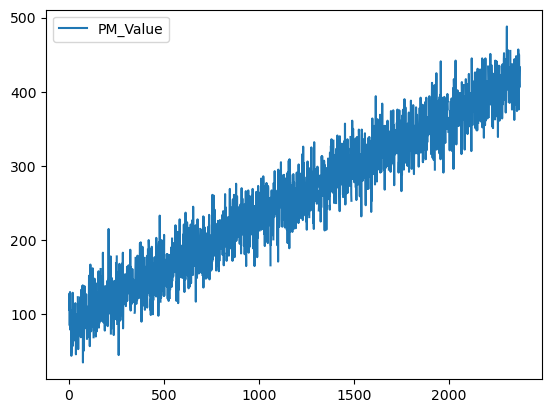

In [95]:
data.plot()

In [96]:
data.isna().sum()

Datetime     60
PM_Value    120
dtype: int64

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
data["PM_Value"].describe()

count    2254.000000
mean      256.081633
std        98.098235
min        35.000000
25%       175.000000
50%       258.000000
75%       339.000000
max       488.000000
Name: PM_Value, dtype: float64

In [99]:
print("There are 120 NA (missing) values in the output variable")

There are 120 NA (missing) values in the output variable


In [100]:
# Calculating the expected values in the data set
# Total number of hours from Jan to April
#we need 4 months dataset

jan = 24 * 31
feb = 24 * 29
mar = 24 * 31
apr = (24 * 30) + 1   #the 1 which creates 20 th datetime in april month

total = jan + feb + mar + apr

In [101]:
print("Total number of observations to be present in the data:", total)
print("Actual number of observations in the data:", len(data))

Total number of observations to be present in the data: 2905
Actual number of observations in the data: 2374


In [102]:
print("Missing data from the actual data:", total - len(data))

Missing data from the actual data: 531


In [103]:
import datetime
# Creating a datetime series with all the dates between the starting and ending dates
start = datetime.datetime.strptime("01-01-2020","%d-%m-%Y")
end = datetime.datetime.strptime("20-04-2020","%d-%m-%Y")

In [104]:
dates = []

for x in range(0,(end-start).days):
    for y in range(0,24):
        data_generated=start+datetime.timedelta(days=x,hours=y)
        dates.append(data_generated)
   

In [105]:
#adding one more value at the end
dates.append(datetime.datetime(2020,4,20))

In [106]:
# Creating a dataframe with full datetime index
data1 = pd.DataFrame(dates, columns=['date'])
data1['PM_Value'] = np.nan

data1.head()

,date,PM_Value
0,2020-01-01 00:00:00,NaN
1,2020-01-01 01:00:00,NaN
2,2020-01-01 02:00:00,NaN
3,2020-01-01 03:00:00,NaN
4,2020-01-01 04:00:00,NaN


In [107]:
data1.tail()

,date,PM_Value
2636,2020-04-19 20:00:00,NaN
2637,2020-04-19 21:00:00,NaN
2638,2020-04-19 22:00:00,NaN
2639,2020-04-19 23:00:00,NaN
2640,2020-04-20 00:00:00,NaN


In [108]:
print(data.columns)
print(data1.columns)


Index(['Datetime', 'PM_Value'], dtype='object')
Index(['date', 'PM_Value'], dtype='object')


In [109]:
#Force BOTH columns to proper datetime (MANDATORY)
data['Datetime'] = pd.to_datetime(data['Datetime'])
data1['date'] = pd.to_datetime(data1['date'])


In [110]:
data.dtypes
data1.dtypes


date        datetime64[ns]
PM_Value           float64
dtype: object

In [111]:
#updating pm values in the new dataset
for i in range(len(data)):
    for j in range(len(data1)):
        if data['Datetime'].iloc[i] == data1['date'].iloc[j]:
            data1['PM_Value'].iloc[j] = data['PM_Value'].iloc[i]
            break


In [112]:
data1

,date,PM_Value
0,2020-01-01 00:00:00,102.0
1,2020-01-01 01:00:00,NaN
2,2020-01-01 02:00:00,NaN
3,2020-01-01 03:00:00,128.0
4,2020-01-01 04:00:00,85.0
...,...,...
2636,2020-04-19 20:00:00,NaN
2637,2020-04-19 21:00:00,NaN
2638,2020-04-19 22:00:00,NaN
2639,2020-04-19 23:00:00,NaN


In [113]:
data1.head()

,date,PM_Value
0,2020-01-01 00:00:00,102.0
1,2020-01-01 01:00:00,NaN
2,2020-01-01 02:00:00,NaN
3,2020-01-01 03:00:00,128.0
4,2020-01-01 04:00:00,85.0


In [114]:
data1.tail()

,date,PM_Value
2636,2020-04-19 20:00:00,NaN
2637,2020-04-19 21:00:00,NaN
2638,2020-04-19 22:00:00,NaN
2639,2020-04-19 23:00:00,NaN
2640,2020-04-20 00:00:00,NaN


In [115]:
data1.isna().sum()

date          0
PM_Value    443
dtype: int64

In [116]:
data1.set_index("date", inplace=True)


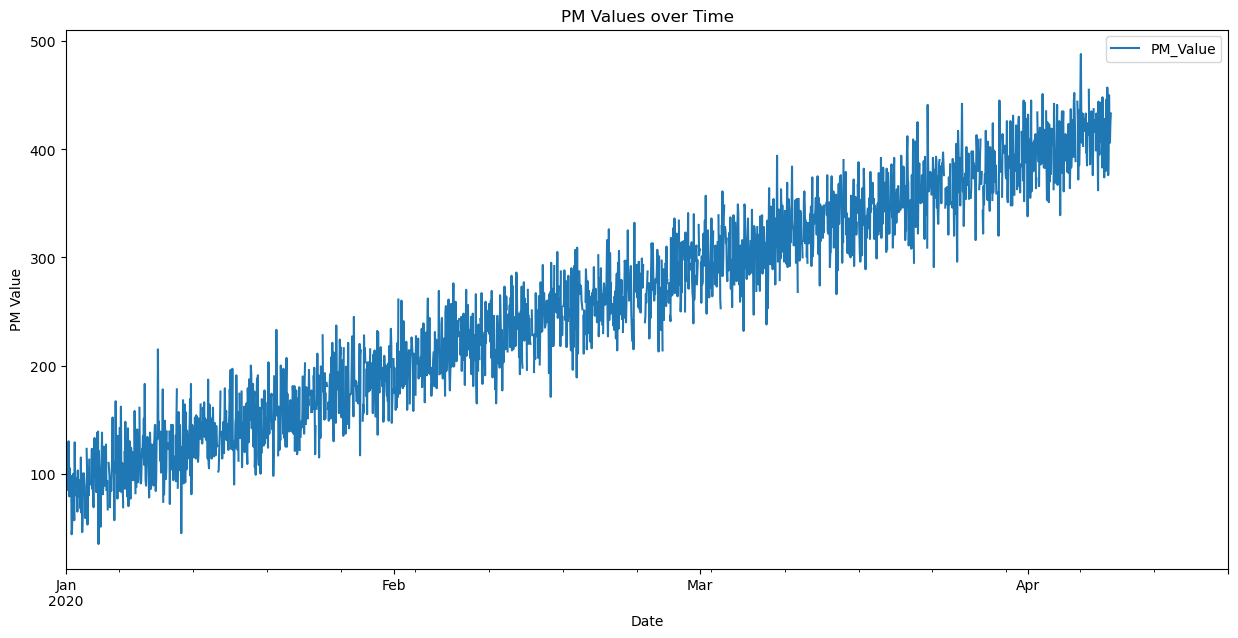

In [117]:
import matplotlib.pyplot as plt

data1.plot(figsize=(15, 7))
plt.xlabel("Date")
plt.ylabel("PM Value")
plt.title("PM Values over Time")
plt.show()


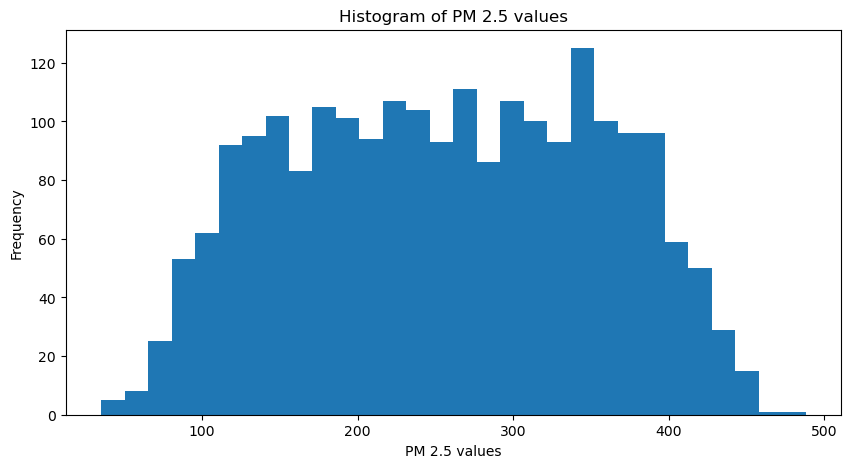

In [118]:
# Analyzing the PM variable

import matplotlib.pyplot as plt

# Histogram of PM values
data1.PM_Value.plot(kind='hist', figsize=(10, 5), bins=30)
plt.xlabel("PM 2.5 values")
plt.ylabel("Frequency")
plt.title("Histogram of PM 2.5 values")
plt.show()


In [119]:
#Plot ONLY non-missing values

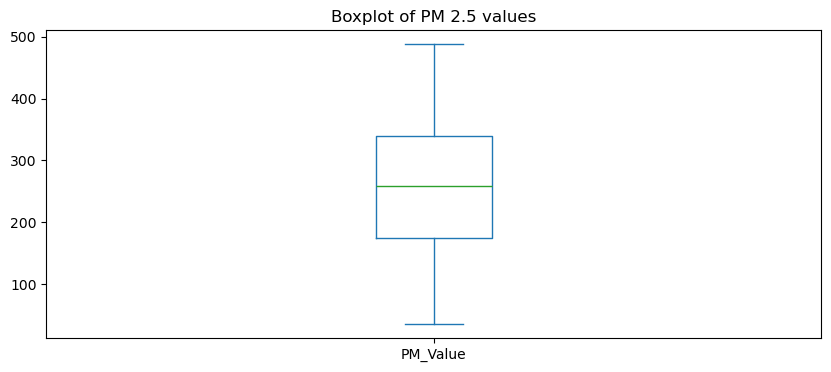

In [120]:
data1['PM_Value'].dropna().plot(kind='box', figsize=(10, 4))
plt.title("Boxplot of PM 2.5 values")
plt.show()



In [121]:
# Missing values interpolation using time-based method
data2 = data1.interpolate(method='time')

In [122]:
data2.head()

,PM_Value
date,
2020-01-01 00:00:00,102.000000
2020-01-01 01:00:00,110.666667
2020-01-01 02:00:00,119.333333
2020-01-01 03:00:00,128.000000
2020-01-01 04:00:00,85.000000


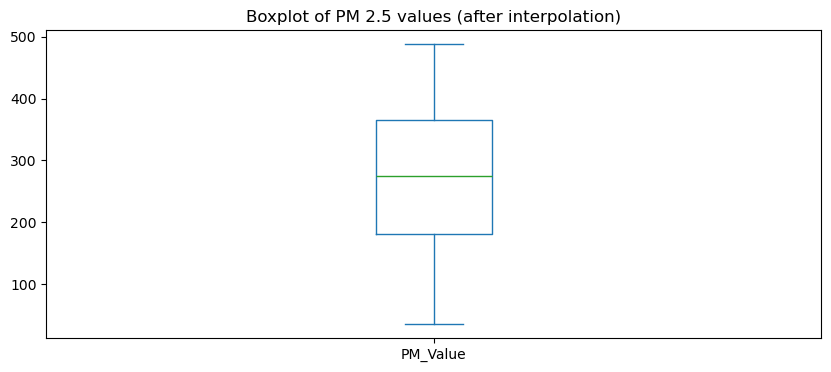

In [123]:
#Plot AFTER interpolation
data2 = data1.interpolate(method='time')

data2['PM_Value'].plot(kind='box', figsize=(10, 4))
plt.title("Boxplot of PM 2.5 values (after interpolation)")
plt.show()


In [124]:
data2['PM_Value'] = data2['PM_Value'].interpolate(method='time')


In [125]:
data1.isna().sum()


PM_Value    443
dtype: int64

In [126]:
data1['PM_Value'] = data1['PM_Value'].interpolate(method='linear')


In [127]:
data1.isna().sum()

PM_Value    0
dtype: int64

In [128]:
'''Forward fill (Last Observation Carried Forward)
data1['PM_Value'] = data1['PM_Value'].ffill()
Backward fill
data1['PM_Value'] = data1['PM_Value'].bfill()
data1['PM_Value'].fillna(data1['PM_Value'].mean(), inplace=True)
'''

"Forward fill (Last Observation Carried Forward)\ndata1['PM_Value'] = data1['PM_Value'].ffill()\nBackward fill\ndata1['PM_Value'] = data1['PM_Value'].bfill()\ndata1['PM_Value'].fillna(data1['PM_Value'].mean(), inplace=True)\n"

<Axes: xlabel='date'>

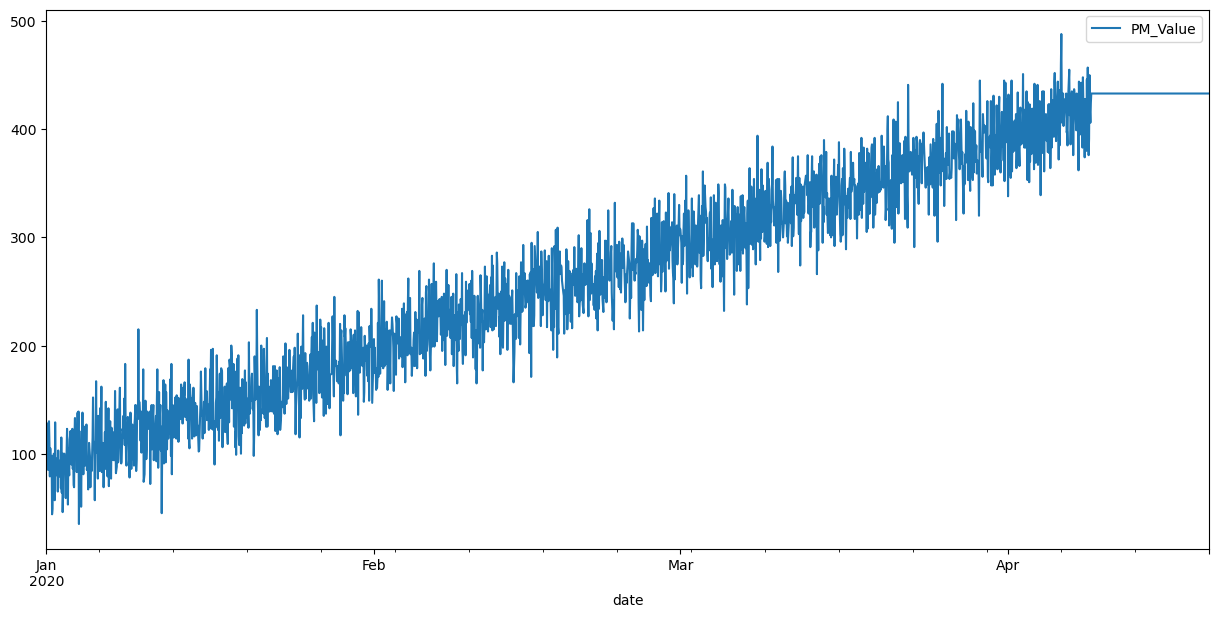

In [129]:
#vizualizing interpolated data
data2.plot(figsize=(15,7))

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def seasonal_decompose_ts(x):
    decomposition = seasonal_decompose(x)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(15, 8))

    plt.subplot(411)
    plt.plot(x, label='Original')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()


In [131]:
decomposition = seasonal_decompose(data2)


In [132]:
decomposition 

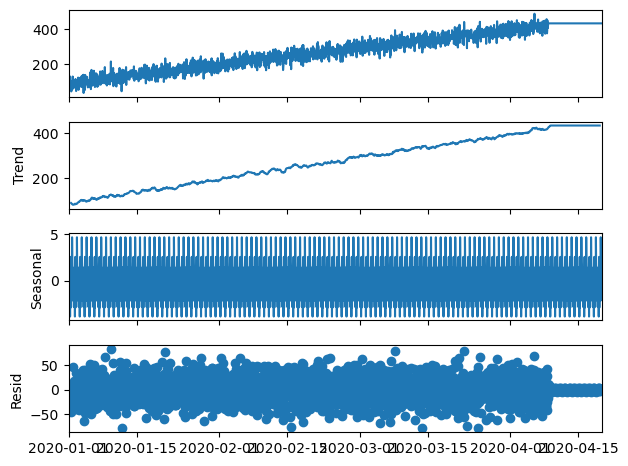

In [133]:
result = seasonal_decompose(data2)
result.plot()
plt.show()

In [134]:
from statsmodels.tsa.stattools import adfuller


In [135]:
def adfuller_test(sales):
    result = adfuller(sales)

    labels = [
        'ADF Test statistic',
        'p-values',
        '#Lags Used',
        'Number of observations used'
    ]

    for value, label in zip(result, labels):
        print(label + ': ' + str(value))

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")


In [136]:
adfuller_test(data2)


ADF Test statistic: -1.0031751831435813
p-values: 0.7521044651073807
#Lags Used: 28
Number of observations used: 2612
The data is not stationary


In [137]:
adf_result = adfuller(data2['PM_Value'])
adf_result

(np.float64(-1.0031751831435813),
 np.float64(0.7521044651073807),
 28,
 2612,
 {'1%': np.float64(-3.4328560253199973),
  '5%': np.float64(-2.8626471695439784),
  '10%': np.float64(-2.567359385689561)},
 np.float64(23874.456881522))

In [138]:
#decomposed result data cannot be applied to adfuller test
#data is not stationary so diff it
data2_diff = data2.diff(periods=1)
data2_diff.head()

,PM_Value
date,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,8.666667
2020-01-01 02:00:00,8.666667
2020-01-01 03:00:00,8.666667
2020-01-01 04:00:00,-43.000000


In [139]:
#again use adf test
adfuller_test(data2['PM_Value'].dropna())

ADF Test statistic: -1.0031751831435813
p-values: 0.7521044651073807
#Lags Used: 28
Number of observations used: 2612
The data is not stationary


<Axes: xlabel='date'>

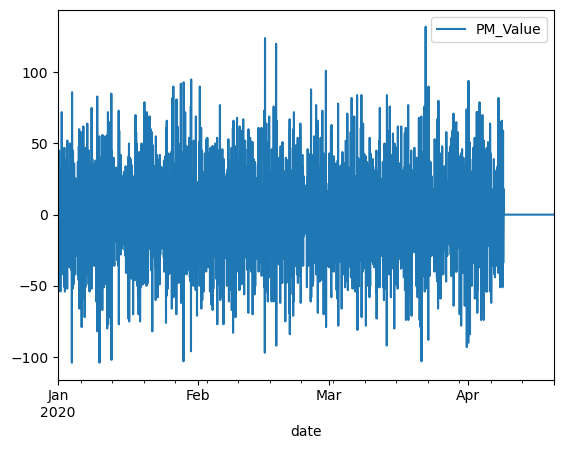

In [140]:
data2_diff.plot()

In [141]:
# another order of differencing
data2_diff2 = data2_diff.diff(periods=1)
data2_diff2.head()


,PM_Value
date,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,-1.421085e-14
2020-01-01 03:00:00,1.421085e-14
2020-01-01 04:00:00,-5.166667e+01


In [142]:
adfuller_test(data2_diff2['PM_Value'].dropna())

ADF Test statistic: -21.018935765536455
p-values: 0.0
#Lags Used: 28
Number of observations used: 2610
The data is stationary


<Axes: xlabel='date'>

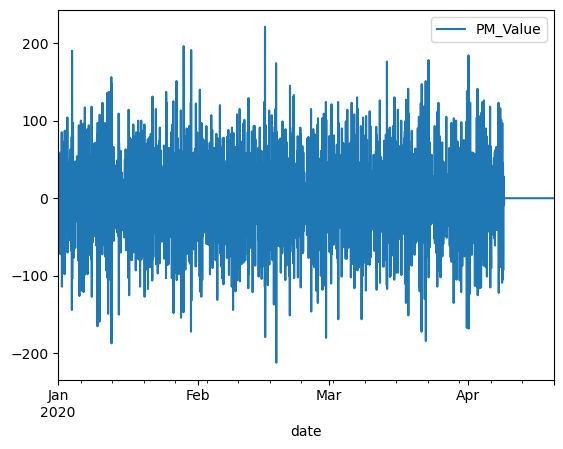

In [143]:
data2_diff2.plot()

In [144]:
pm_clean = data2_diff2['PM_Value'].dropna()


In [145]:
def test_stat(PM_Value):
    rol_mean = PM_Value.rolling(window=24).mean()
    rol_std = PM_Value.rolling(window=24).std()

    plt.figure(figsize=(15,6))
    orig = plt.plot(PM_Value, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)


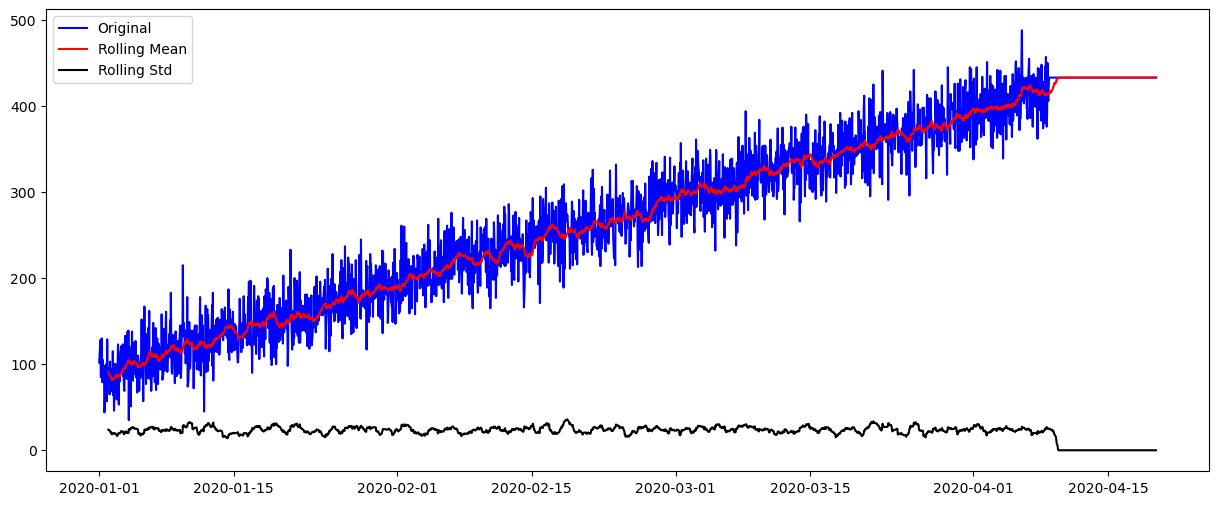

In [146]:
test_stat(data2['PM_Value'])


blue is riginal data and red and back are rolling mean and roling std dev which are not costant so data is not stationary so we regular difference it again

If the mean is constant

If the variance is constant

If data fluctuates around a stable level

🔹 Interpretation:

If rolling mean & std are flat → likely stationary

If they change over time → not stationary

⚠️ This is graphical analysis only, not a statistical test.

In [147]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def test_stat(PM_Value):
    rol_mean = PM_Value.rolling(window=24).mean()
    rol_std = PM_Value.rolling(window=24).std()

    plt.figure(figsize=(15,6))
    plt.plot(PM_Value, label='Original')
    plt.plot(rol_mean, label='Rolling Mean')
    plt.plot(rol_std, label='Rolling Std')
    plt.legend(loc='best')
    plt.show()

# Drop NaNs before ADF
pm_clean = data2_diff2['PM_Value'].dropna()

result = adfuller(pm_clean, autolag='AIC')

labels = [
    'ADF Test statistic',
    'p-value',
    '#lags used',
    'number of observations used'
]

for value, label in zip(result, labels):
    print(label + ': ' + str(value))

print('Critical Values:')
for key, value in result[4].items():
    print(f'{key} : {value}')

if result[1] <= 0.05:
    print("Time series is stationary")
else:
    print("Time series is not stationary")


ADF Test statistic: -21.018935765536455
p-value: 0.0
#lags used: 28
number of observations used: 2610
Critical Values:
1% : -3.4328579475395395
5% : -2.8626480184291183
10% : -2.567359837641843
Time series is stationary


<Axes: xlabel='date'>

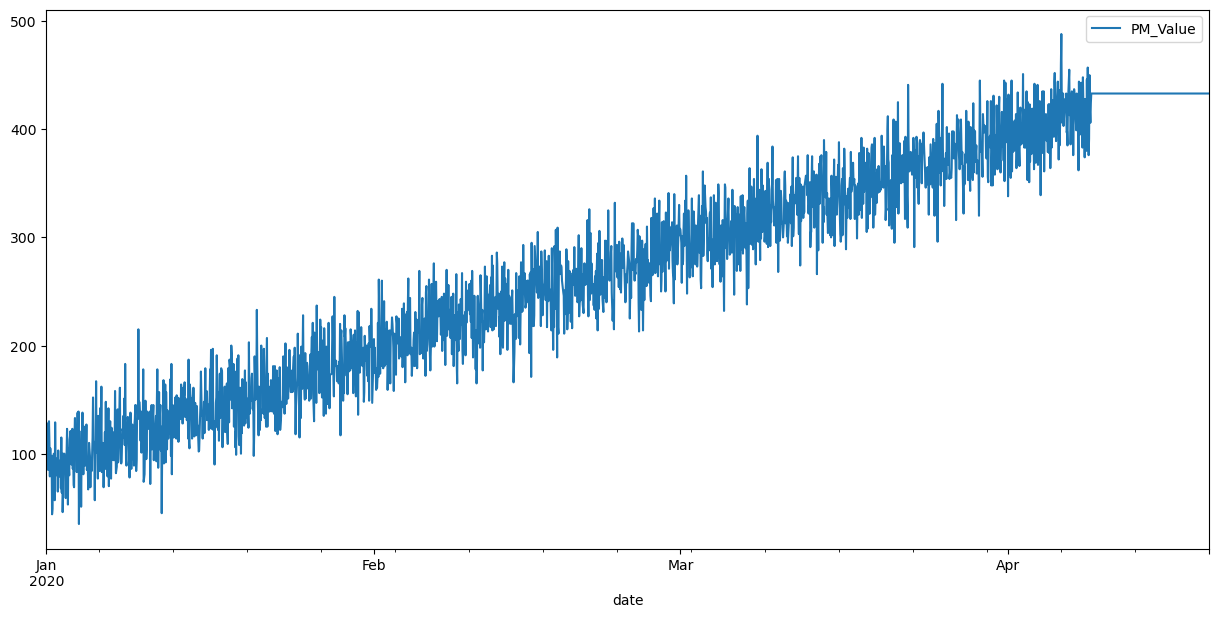

In [148]:
data2.plot(figsize=(15,7))#original data

Differencing the data once again to achieve stationarity

In [149]:
# another order of differencing
data2_diff3 = data2_diff2.diff(periods=1)
data2_diff3.head()


,PM_Value
date,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,NaN
2020-01-01 03:00:00,2.842171e-14
2020-01-01 04:00:00,-5.166667e+01


In [150]:
#Again check using ADF test
adfuller_test(data2_diff3['PM_Value'].dropna())

ADF Test statistic: -23.975699816795657
p-values: 0.0
#Lags Used: 28
Number of observations used: 2609
The data is stationary


<Axes: xlabel='date'>

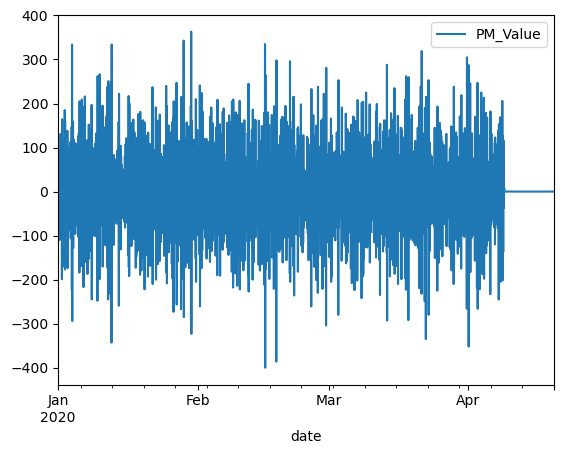

In [151]:
data2_diff3.plot()

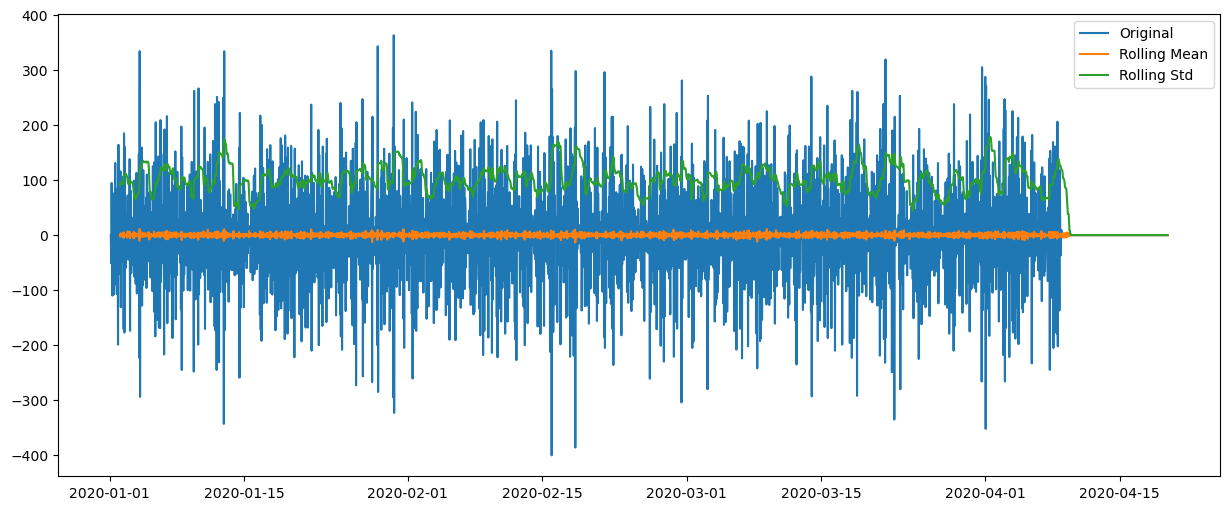

In [152]:
#do rolling test
test_stat(data2_diff3.dropna())

now mean and variance are constant

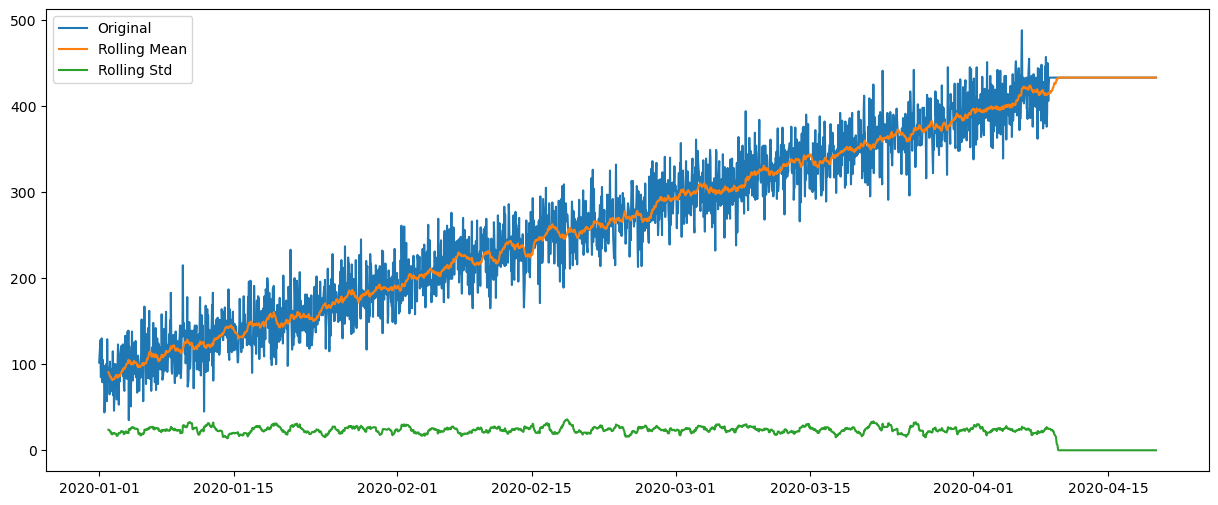

In [153]:
test_stat(data2)

this is original data but in our differenced data after order=3 we get mean and std dev around constant and time series data become stationary

we found d value as 3 now ets find p and q values

In [154]:
#Plotting ACF and PACF to find p and q values
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


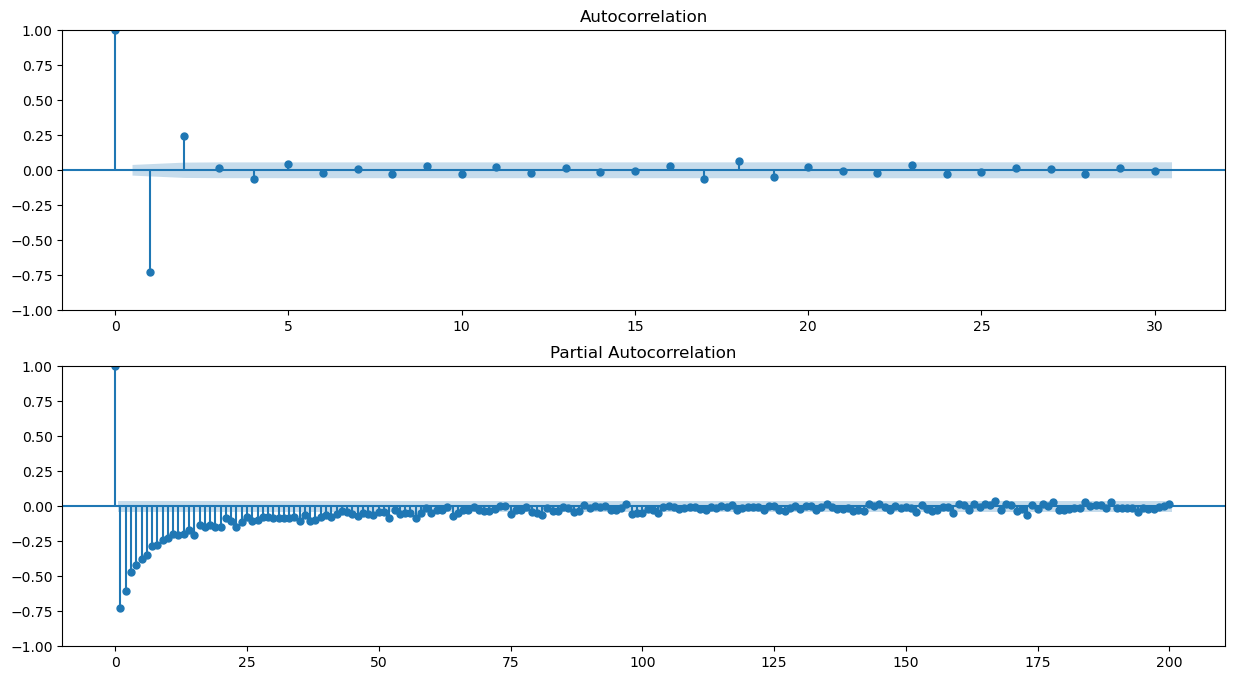

In [155]:
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(data2_diff3.dropna(), lags=30, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(data2_diff3.dropna(), lags=200, ax=ax2)

plt.show()


p value is 2 and q value is 4 and d value is 3

AR / ARIMA Model Building

In [156]:
from statsmodels.tsa.arima.model import ARIMA


Differencing is already handled internally by ARIMA when d > 0

🧠 What actually happens in your code
Your model code:
model_ar = ARIMA(data2['pm'], order=(3, 1, 0))


Here:

p = 3 → AR terms

d = 1 → first-order differencing

q = 0 → no MA terms

📌 When d = 1, ARIMA automatically differences the data once internally
So you do NOT need to pass data2_diff manually.

Method 2 (Manual differencing)

If you already differenced:

data_diff = data.diff().dropna()


Then you MUST set d = 0:

ARIMA(data_diff, order=(p, 0, q))


⚠ If you use d=1 again → double differencing (WRONG)

❌ What you should NOT do
ARIMA(data_diff, order=(3, 1, 0))  ❌


🚨 This causes:

Over-differencing

Loss of information

Poor forecasts

In [157]:
#two types of building AR model
from statsmodels.tsa.arima.model import ARIMA

AR Model using ARIMA (q = 0)

(AR model means only p and d, no MA part)

p value is 2 and q value is 4 and d value is 3

In [158]:
model_ar = ARIMA(data2['PM_Value'], order=(2, 3, 0))
model_ar_fit = model_ar.fit()


In [159]:
data2.index = pd.to_datetime(data2.index)


In [160]:
data2 = data2.asfreq('H')   # H = hourly


In [161]:
model_ar = ARIMA(data2['PM_Value'], order=(2, 3, 0))
model_ar_fit = model_ar.fit()

In [162]:
model_ar_fit.aic


np.float64(28415.26605132008)

In [163]:
model_ar_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(2, 3, 0)   Log Likelihood              -14204.633
Date:                Wed, 14 Jan 2026   AIC                          28415.266
Time:                        16:51:18   BIC                          28432.899
Sample:                    01-01-2020   HQIC                         28421.650
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1717      0.014    -82.383      0.000      -1.200      -1.144
ar.L2         -0.6082      0.014    -42.060      0.000      -0.637      -0.580
sigma2      2782.9491     66.816     41.651      0.000    2651.993    2913.905
===================================================================================
Ljung-Box (L1) (Q):                 218.94   Jarque-Bera (JB):                46.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
#Alternate AR-only method (Direct AR model)
from statsmodels.tsa.ar_model import AutoReg


In [165]:
from statsmodels.tsa.ar_model import AutoReg

In [166]:
model_ar = AutoReg(data2.PM_Value[:48],lags=2)
model_ar_fit = model_ar.fit()


In [167]:
#Forecasting using AR Model
data2['forecast_ar'] = model_ar_fit.predict(
    start=2617,
    end=2640,
    dynamic=True
)


IndexError: index 2616 is out of bounds for axis 0 with size 48

In [168]:
data2

,PM_Value
date,
2020-01-01 00:00:00,102.000000
2020-01-01 01:00:00,110.666667
2020-01-01 02:00:00,119.333333
2020-01-01 03:00:00,128.000000
2020-01-01 04:00:00,85.000000
...,...
2020-04-19 20:00:00,433.000000
2020-04-19 21:00:00,433.000000
2020-04-19 22:00:00,433.000000


In [169]:
start = len(data2) - 24
end = len(data2) + 24

data2['forecast_ar'] = model_ar_fit.predict(start=start, end=end, dynamic=True)


IndexError: index 2616 is out of bounds for axis 0 with size 48

In [170]:
data2['forecast_ar'] = model_ar_fit.predict(
    start='2020-04-19 00:00:00',
    end='2020-04-20 00:00:00',
    dynamic=True
)


IndexError: index 2615 is out of bounds for axis 0 with size 48

In [171]:
forecast = model_ar_fit.predict(
    start=data2.index[-24],
    end=data2.index[-1],
    dynamic=True
)

data2['forecast_ar'] = forecast


IndexError: index 2616 is out of bounds for axis 0 with size 48

In [172]:
nobs = len(model_ar_fit.model.endog)
print(nobs)


48


In [173]:
forecast = model_ar_fit.predict(
    start=nobs,
    end=nobs + 23,   # next 24 steps
    dynamic=False
)


In [174]:
future_index = pd.date_range(
    start=data2.index[-1],
    periods=24,
    freq='H'
)

forecast.index = future_index


In [175]:
data2[future_index]=forecast.index 

In [176]:
data2[['PM_Value','future_index']][2500:].plot(figsize=(5,7))

KeyError: "['future_index'] not in index"

In [ ]:
data2

In [177]:
data2 = data2[['PM_Value']]
#Remove the wrongly created columns

Create forecast Series correctly

In [178]:
forecast = model_ar_fit.predict(
    start=len(model_ar_fit.model.endog),
    end=len(model_ar_fit.model.endog) + 23,
    dynamic=False
)


Create future datetime index

In [179]:
future_index = pd.date_range(
    start=data2.index[-1] + pd.Timedelta(hours=1),
    periods=24,
    freq='H'
)


Create a NEW forecast dataframe

In [180]:
forecast_df = pd.DataFrame(
    {'forecast_ar': forecast.values},
    index=future_index
)


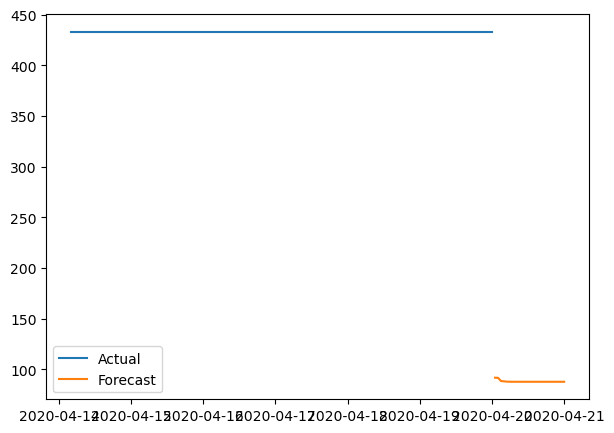

In [181]:
plt.figure(figsize=(7,5))

plt.plot(data2['PM_Value'][2500:], label='Actual')
plt.plot(forecast_df['forecast_ar'], label='Forecast')

plt.legend()
plt.show()


In [182]:
data2['PM_Value'][-50:].std()  #Check variance of last 50 points


0.0

In [183]:
#Check what data AR was trained on
model_ar_fit.model.endog[:10]


array([102.        , 110.66666667, 119.33333333, 128.        ,
        85.        ,  85.        , 130.        , 110.        ,
        79.        , 105.        ])

If values are small (~0–10) → you trained on differenced data.

In [184]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data2['PM_Value'], order=(2,1,2))
fit = model.fit()

forecast = fit.forecast(steps=24)


If you use differencing, inverse it

In [185]:
forecast_level = data2['PM_Value'].iloc[-1] + forecast.cumsum()


In [186]:
#Turn off dynamic prediction
forecast = model_ar_fit.predict(
    start=len(data2),
    end=len(data2)+23,
    dynamic=False
)


In [187]:
#create new dataframe 
forecast_df1 = pd.DataFrame(
    {'forecast_ar': forecast.values},
    index=future_index
)


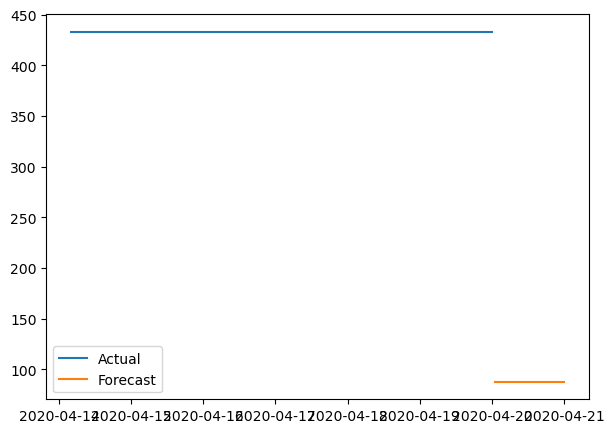

In [188]:
plt.figure(figsize=(7,5))

plt.plot(data2['PM_Value'][2500:], label='Actual')
plt.plot(forecast_df1['forecast_ar'], label='Forecast')

plt.legend()
plt.show()


Plotting Actual vs AR Forecast

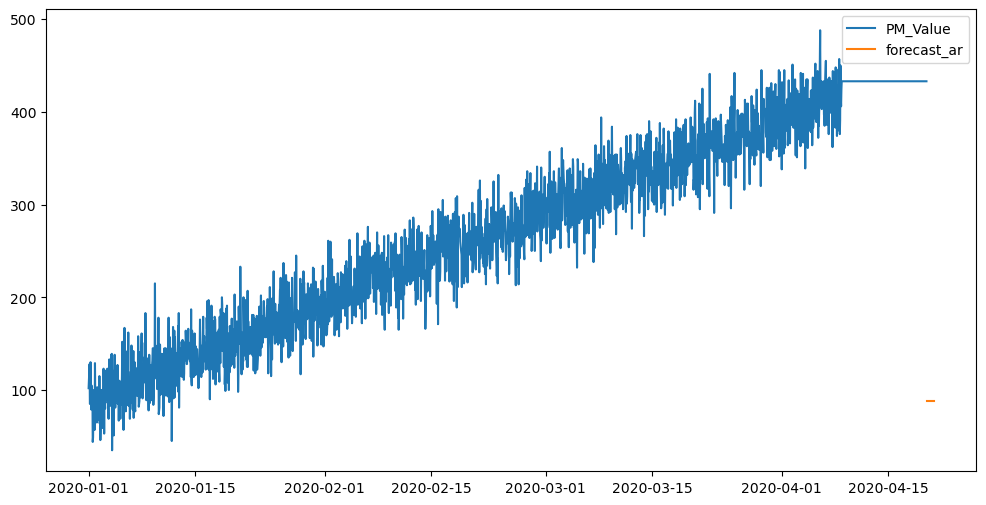

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data2['PM_Value'], label='PM_Value')
plt.plot(forecast_df1['forecast_ar'], label='forecast_ar')
plt.legend()
plt.show()


In [190]:
data2

,PM_Value
date,
2020-01-01 00:00:00,102.000000
2020-01-01 01:00:00,110.666667
2020-01-01 02:00:00,119.333333
2020-01-01 03:00:00,128.000000
2020-01-01 04:00:00,85.000000
...,...
2020-04-19 20:00:00,433.000000
2020-04-19 21:00:00,433.000000
2020-04-19 22:00:00,433.000000


RMSE Calculation for AR Model

In [191]:
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_AR = np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        forecast_df1.forecast_ar[2617:2641]
    )
)

print("RMSE:", RMSE_AR)


ValueError: Found input variables with inconsistent numbers of samples: [24, 0]

In [194]:
print(forecast_df1.forecast_ar.index)
print(len(forecast_df1.forecast_ar))
#CHECK FORECAST INDEX

DatetimeIndex(['2020-04-20 01:00:00', '2020-04-20 02:00:00',
               '2020-04-20 03:00:00', '2020-04-20 04:00:00',
               '2020-04-20 05:00:00', '2020-04-20 06:00:00',
               '2020-04-20 07:00:00', '2020-04-20 08:00:00',
               '2020-04-20 09:00:00', '2020-04-20 10:00:00',
               '2020-04-20 11:00:00', '2020-04-20 12:00:00',
               '2020-04-20 13:00:00', '2020-04-20 14:00:00',
               '2020-04-20 15:00:00', '2020-04-20 16:00:00',
               '2020-04-20 17:00:00', '2020-04-20 18:00:00',
               '2020-04-20 19:00:00', '2020-04-20 20:00:00',
               '2020-04-20 21:00:00', '2020-04-20 22:00:00',
               '2020-04-20 23:00:00', '2020-04-21 00:00:00'],
              dtype='datetime64[ns]', freq='h')
24


In [200]:
#COMPUTE RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

actual = data2['PM_Value'].iloc[2617:2641].values
predicted = forecast_df1['forecast_ar'].values

RMSE_AR = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", RMSE_AR)


RMSE: 345.36242637221636


ALIGN FORECAST WITH DATAFRAME (FOR PLOTTING)

If you want forecast_ar inside data2:

In [201]:
data2.loc[data2.index[2617:2641], 'forecast_ar'] = forecast_df1['forecast_ar'].values


In [202]:
data2

,PM_Value,forecast_ar
date,,
2020-01-01 00:00:00,102.000000,NaN
2020-01-01 01:00:00,110.666667,NaN
2020-01-01 02:00:00,119.333333,NaN
2020-01-01 03:00:00,128.000000,NaN
2020-01-01 04:00:00,85.000000,NaN
...,...,...
2020-04-19 20:00:00,433.000000,87.637574
2020-04-19 21:00:00,433.000000,87.637574
2020-04-19 22:00:00,433.000000,87.637574


<Axes: xlabel='date'>

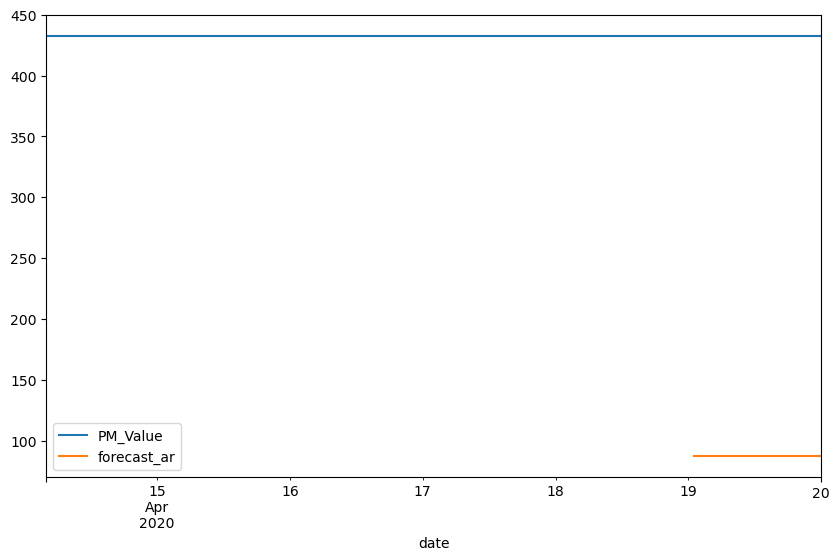

In [203]:
data2[['PM_Value','forecast_ar']].iloc[2500:].plot(figsize=(10,6))


SARIMAX Model (Seasonality Included)

In [204]:
import statsmodels.api as sm


In [205]:
model1 = sm.tsa.statespace.SARIMAX(
    data2.PM_Value,
    order=(2, 1, 0),
    seasonal_order=(2, 1, 0, 24)
)

result = model1.fit()


SARIMAX Forecast

In [206]:
data2['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=True
)


Plot Actual vs SARIMAX Forecast

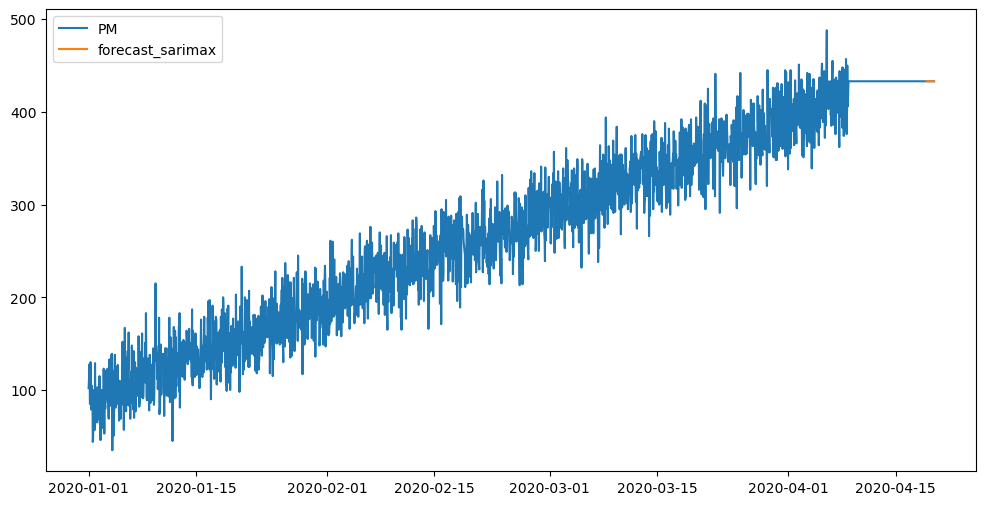

In [207]:
plt.figure(figsize=(12, 6))
plt.plot(data2['PM_Value'], label='PM')
plt.plot(data2['forecast_sarimax'], label='forecast_sarimax')
plt.legend()
plt.show()


In [208]:
data2['forecast_sarimax']=result.predict(start=2617,end=2641,dynamic=True)

<Axes: xlabel='date'>

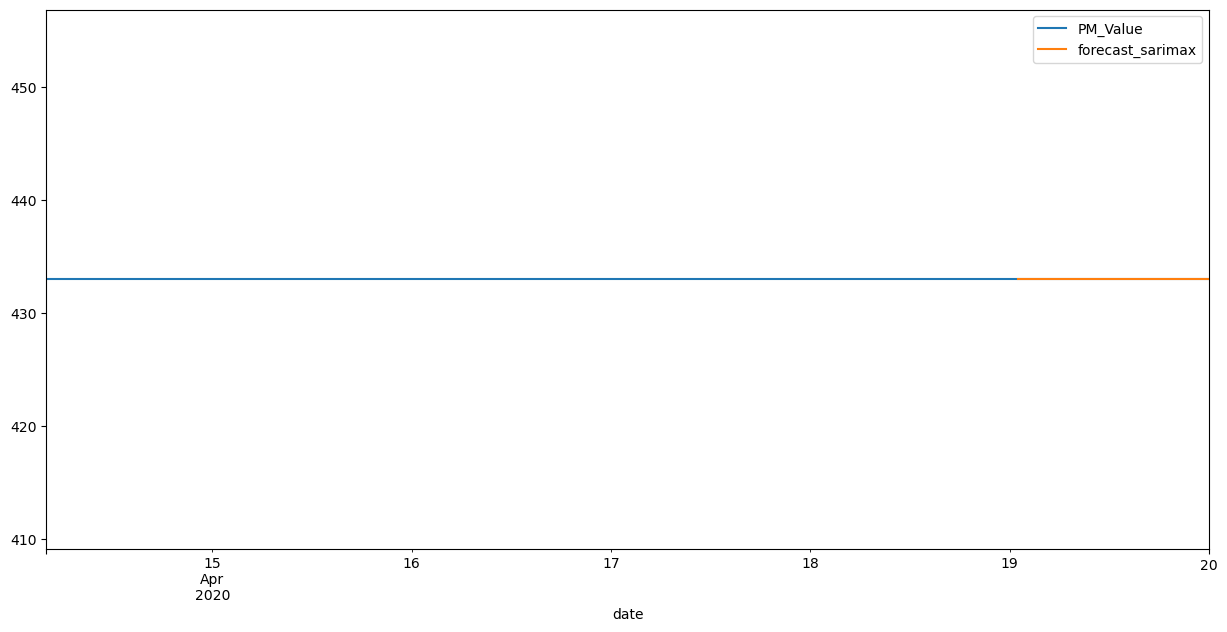

In [209]:
data2[['PM_Value','forecast_sarimax']][2500:].plot(figsize=(15,7))

In [210]:
data2

,PM_Value,forecast_ar,forecast_sarimax
date,,,
2020-01-01 00:00:00,102.000000,NaN,NaN
2020-01-01 01:00:00,110.666667,NaN,NaN
2020-01-01 02:00:00,119.333333,NaN,NaN
2020-01-01 03:00:00,128.000000,NaN,NaN
2020-01-01 04:00:00,85.000000,NaN,NaN
...,...,...,...
2020-04-19 20:00:00,433.000000,87.637574,433.0
2020-04-19 21:00:00,433.000000,87.637574,433.0
2020-04-19 22:00:00,433.000000,87.637574,433.0


RMSE for SARIMAX

In [211]:
RMSE_SARIMAX = np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        data2.forecast_sarimax[2617:2641]
    )
)

print("RMSE:", RMSE_SARIMAX)


RMSE: 1.160311428702309e-14


RMSE Calculation (AR Model)

In [212]:
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_AR = np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        data2.forecast_ar[2617:2641]
    )
)

print("RMSE:", RMSE_AR)


RMSE: 345.36242637221636


RMSE Calculation (AR Model) using SARIMAX MODEL

In [213]:
RMSE_AR_SARIMAX= np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        data2.forecast_sarimax[2617:2641]
    )
)

print("RMSE:", RMSE_AR_SARIMAX)


RMSE: 1.160311428702309e-14


Building MA / ARIMA(0,1,4) Model

In [214]:
from statsmodels.tsa.arima.model import ARIMA

model_ma = ARIMA(data2.PM_Value, order=(0, 1, 4))
model_ma_fit = model_ma.fit()


In [215]:
model_ma_fit.aic


np.float64(24124.869055549774)

In [216]:
model_ma_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(0, 1, 4)   Log Likelihood              -12057.435
Date:                Wed, 14 Jan 2026   AIC                          24124.869
Time:                        16:58:03   BIC                          24154.262
Sample:                    01-01-2020   HQIC                         24135.510
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8980      0.018    -50.179      0.000      -0.933      -0.863
ma.L2         -0.0774      0.024     -3.244      0.001      -0.124      -0.031
ma.L3          0.0301      0.026      1.169      0.242      -0.020       0.081
ma.L4         -0.0010      0.019     -0.054      0.957      -0.038       0.036
sigma2       542.2279     13.341     40.642      0.000     516.079     568.377
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                28.51
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
data2['forecast_MA']=model_ma_fit.predict(start=2617,end=2641,dynamic=True)

<Axes: xlabel='date'>

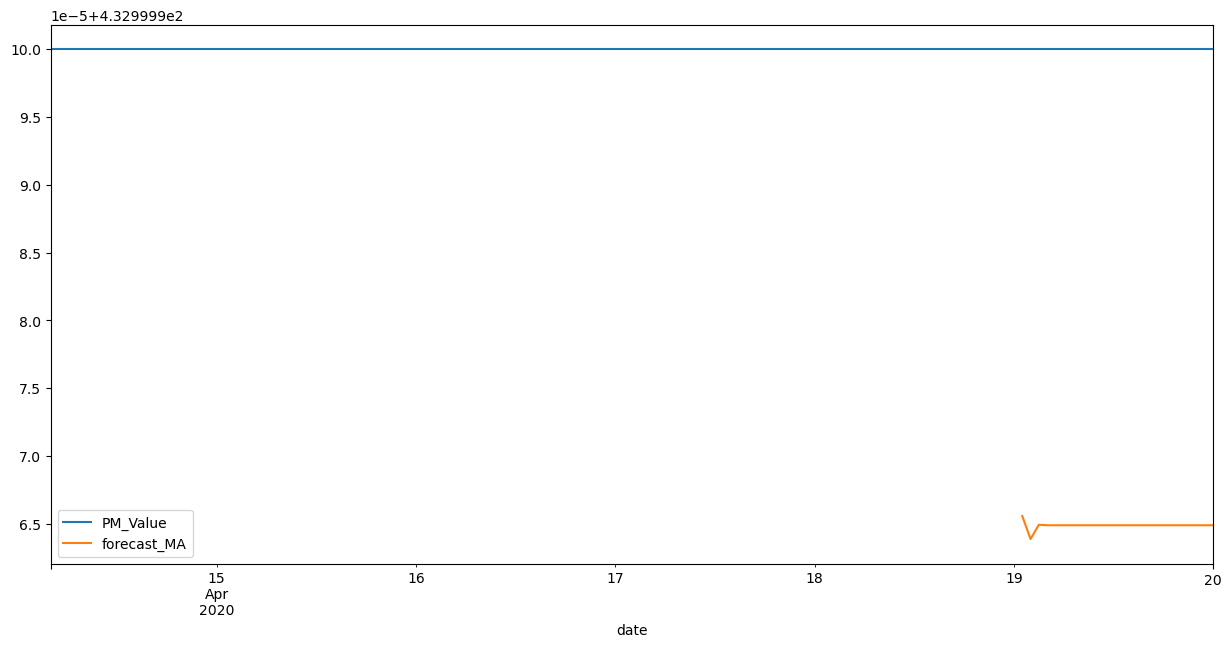

In [218]:
data2[['PM_Value','forecast_MA']][2500:].plot(figsize=(15,7))

MA AND AR MODEL ALSO NOT SUITABLE SICE IT HAS SEASONAL DATA ONLY SARIMA IS SUITABLE

SARIMAX Model (Seasonal ARIMA)

In [219]:
import statsmodels.api as sm


In [220]:
model2 = sm.tsa.statespace.SARIMAX(
    data2.PM_Value,
    order=(0, 1, 4),
    seasonal_order=(1, 1, 1, 24)
)


24 is used because this is 24-hour (daily) seasonality data

In [221]:
result1 = model2.fit()


In [222]:
result.mle_retvals


{'fopt': np.float64(4.794889385609513),
 'gopt': array([-6.06892314e-07, -1.62603264e-05, -6.11244388e-07, -1.29596778e-05,
         1.02007292e-06]),
 'fcalls': 78,
 'warnflag': 0,
 'converged': True,
 'iterations': 10}

In [223]:
model2 = sm.tsa.statespace.SARIMAX(
    data2.PM_Value,
    order=(0,1,4),
    seasonal_order=(1,1,0,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model2.fit(maxiter=200,method='powell', disp=False)


In [224]:
data2['forecast_SARIMAX']=result1.predict(start=2617,end=2641,dynamic=True)

<Axes: xlabel='date'>

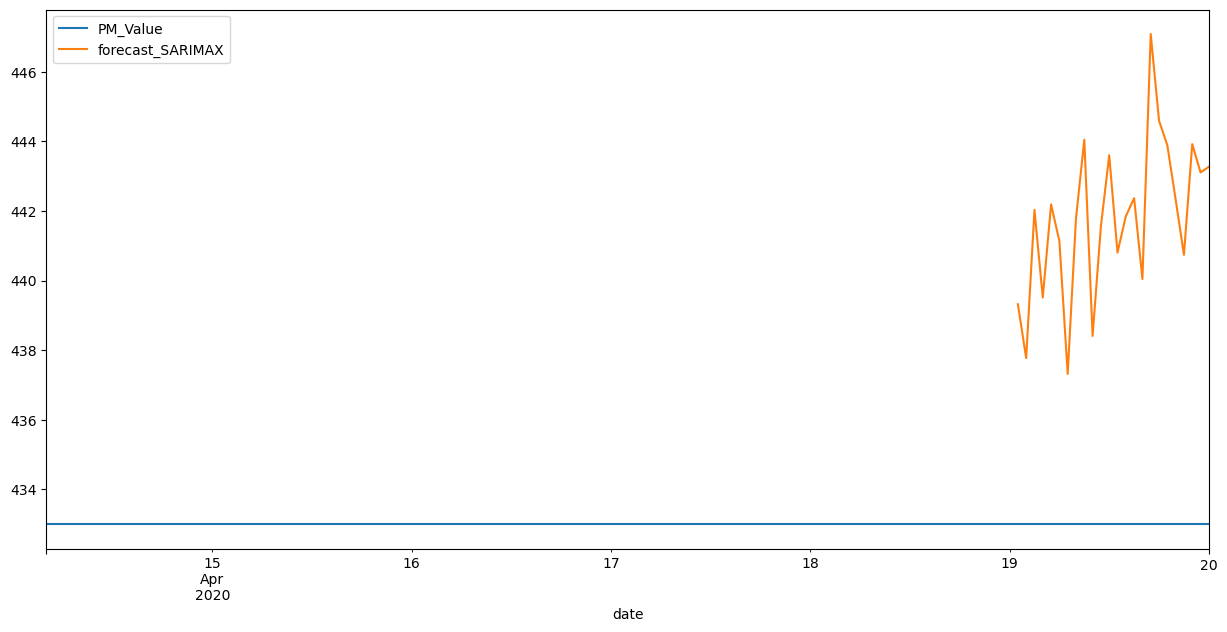

In [225]:
data2[['PM_Value','forecast_SARIMAX']][2500:].plot(figsize=(15,7))

RMSE Calculation (SARIMA)

In [226]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [227]:
RMSE_MA_SARIMA = np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        data2.forecast_sarimax[2617:2641]
    )
)


In [228]:
print("RMSE:", RMSE_MA_SARIMA)


RMSE: 1.160311428702309e-14


ARIMA MODEL

In [229]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model
model_arima = ARIMA(data2.PM_Value, order=(3,1,4))

# Fit the model
model_arima_fit = model_arima.fit()

# Check AIC value
model_arima_fit.aic


np.float64(24124.6210087855)

In [230]:
data2['pm_scaled'] = (data2.PM_Value - data2.PM_Value.mean()) / data2.PM_Value.std()


In [231]:
# Fit the model
model_arima_fit = model_arima.fit(maxiter=500,method='nm',disp=False)

TypeError: ARIMA.fit() got an unexpected keyword argument 'maxiter'

In [232]:
model_arima_fit = model_arima.fit(
    method='powell',
    method_kwargs={'maxiter': 500},
    disp=False
)


TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

In [233]:
#If convergence warning still appears
model_arima_fit = model_arima.fit(
    method='lbfgs',
    method_kwargs={'maxiter': 1000}
)


ValueError: "lbfgs" is not a valid estimator.

In [234]:
#If convergence warning still appears
model_arima_fit = model_arima.fit(
    method='statespace',
    method_kwargs={'maxiter': 1000}
)


In [235]:
type(model_arima)


statsmodels.tsa.arima.model.ARIMA

In [236]:
# Check AIC value
model_arima_fit.aic

np.float64(24116.870996680194)

In [237]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -12050.435
Date:                Wed, 14 Jan 2026   AIC                          24116.871
Time:                        17:00:04   BIC                          24163.899
Sample:                    01-01-2020   HQIC                         24133.897
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9922      0.176     -5.649      0.000      -1.336      -0.648
ar.L2         -1.2217      0.068    -18.038      0.000      -1.354      -1.089
ar.L3         -0.5991      0.174     -3.446      0.001      -0.940      -0.258
ma.L1          0.0986      0.168      0.588      0.557      -0.230       0.427
ma.L2          0.2617      0.093      2.825      0.005       0.080       0.443
ma.L3         -0.5340      0.106     -5.016      0.000      -0.743      -0.325
ma.L4         -0.6229      0.157     -3.962      0.000      -0.931      -0.315
sigma2       540.6833     13.538     39.940      0.000     514.150     567.216
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                27.05
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
model_arima_fit.mle_retvals
#CHECK FOR CONVERGENCE

{'fopt': np.float64(4.562830555978833),
 'gopt': array([-3.75034670e-04,  7.81642306e-05, -1.39879486e-04, -9.09115716e-04,
        -4.27109903e-05, -3.86436660e-05,  5.72100589e-05,  1.42640388e-04]),
 'fcalls': 1917,
 'warnflag': 0,
 'converged': True,
 'iterations': 167}

SARIMAX WITH HYPER TUNING FOR BEST RESULT

In [239]:
model = sm.tsa.statespace.SARIMAX(
    data2['PM_Value'],
    order=(3,1,4),
    seasonal_order=(1,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result3 = model.fit(method='lbfgs', maxiter=1000)


ARIMA – Prediction Code

<Axes: xlabel='date'>

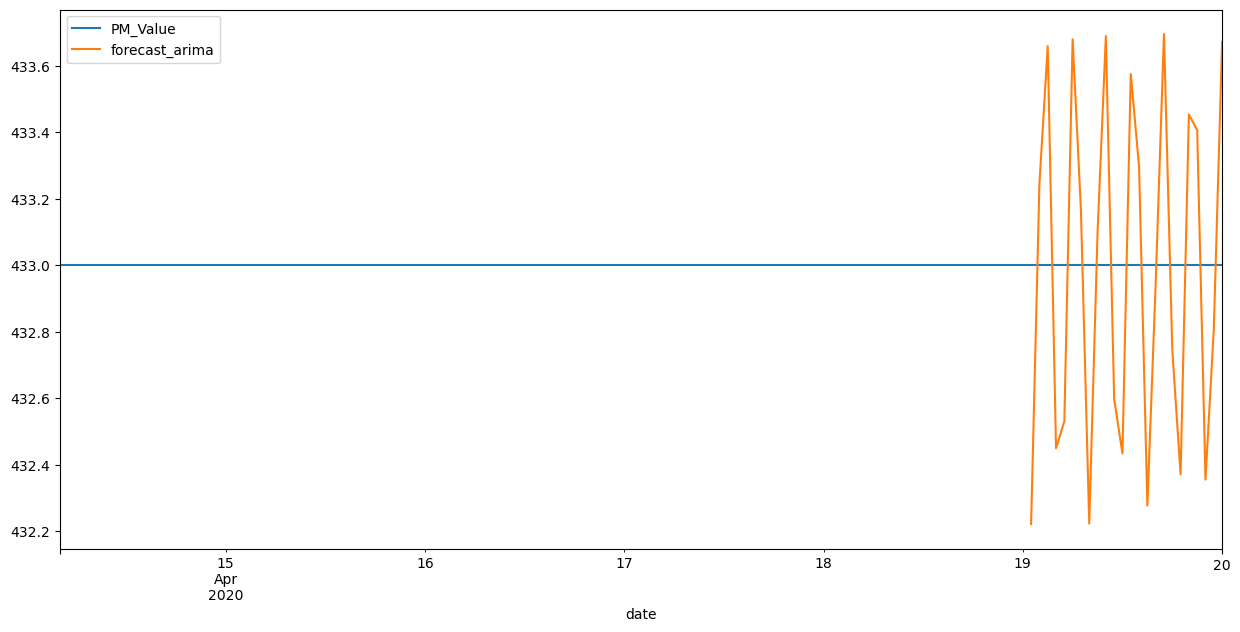

In [240]:
# prediction
# predicting the values using the model

data2['forecast_arima'] = model_arima_fit.predict(
    start=2617,
    end=2644,
    dynamic=True
)

data2[['PM_Value', 'forecast_arima']][2500:].plot(figsize=(15,7))



SARIMAX – Seasonal Model Code

<Axes: xlabel='date'>

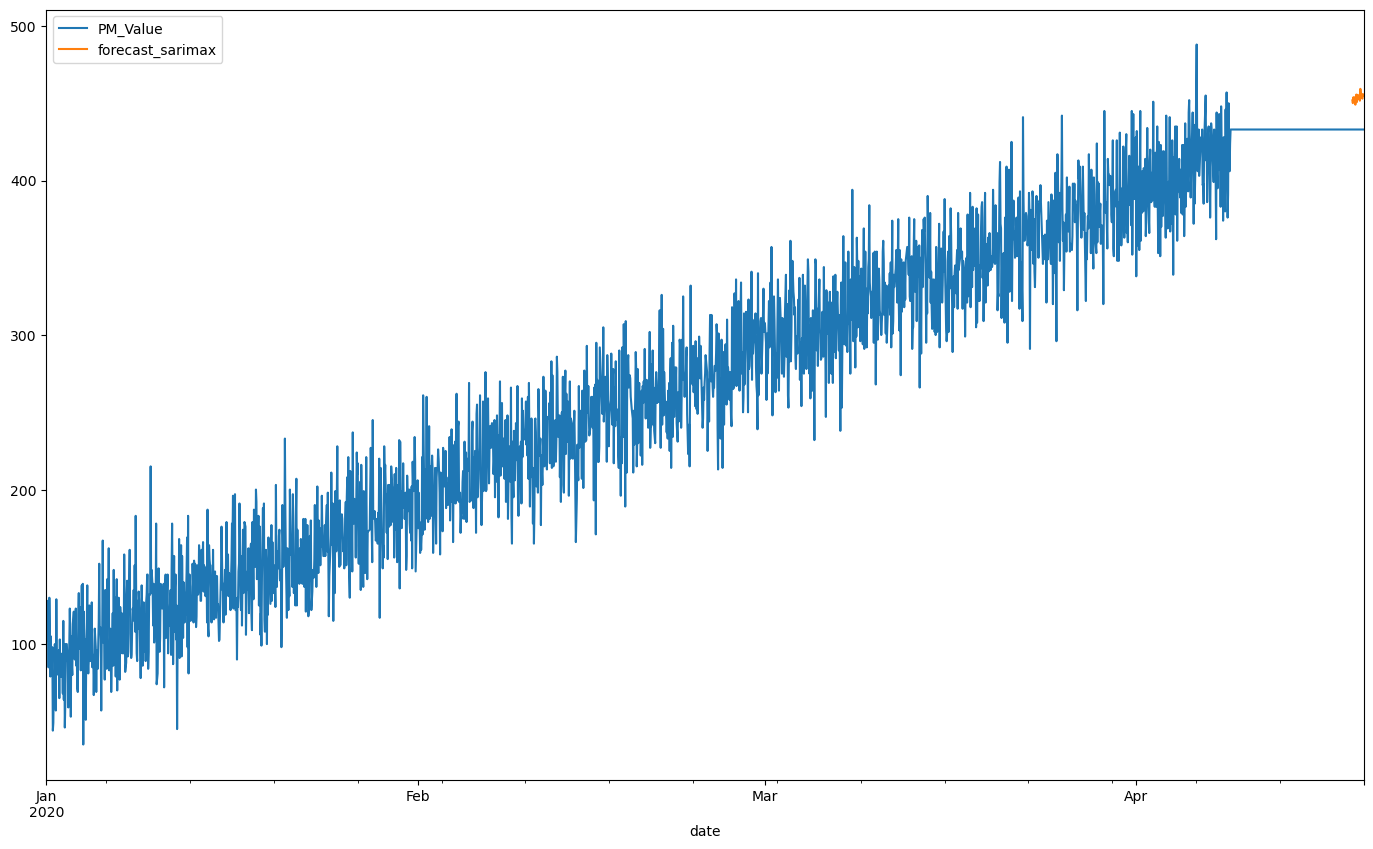

In [241]:
# using the SARIMAX model to account for seasonality

model3 = sm.tsa.statespace.SARIMAX(
    data2.PM_Value,
    order=(3,1,4),
    seasonal_order=(3,1,1,24)
)

result = model3.fit()

data2['forecast_sarimax'] = result.predict(
    start=2617,
    end=2644,
    dynamic=True
)

data2[['PM_Value', 'forecast_sarimax']].plot(figsize=(17,10))




Model Evaluation – RMSE

In [242]:
# Evaluating the model

RMSE_ARIMA_SARIMA = np.sqrt(
    mean_squared_error(
        data2.PM_Value[2617:2641],
        data2.forecast_sarimax[2617:2641]
    )
)

print("RMSE :", RMSE_ARIMA_SARIMA)


RMSE : 20.917357031024437


Creating Another Dataset (for new imputation method)

In [243]:
data3 = data2.reset_index(level=0)


In [244]:
data3.isna().sum()


date                   0
PM_Value               0
forecast_ar         2617
forecast_sarimax    2617
forecast_MA         2617
forecast_SARIMAX    2617
pm_scaled              0
forecast_arima      2617
dtype: int64

Imputing NA Values Using Previous Day Data

In [245]:
# Imputing NA values with previous day data

x = data3[data3.PM_Value.isna()]

for i in x.index:
    data3.PM_Value[i] = data3.PM_Value[i - 24]


In [246]:
data3.set_index('date', inplace=True)


<Axes: xlabel='date'>

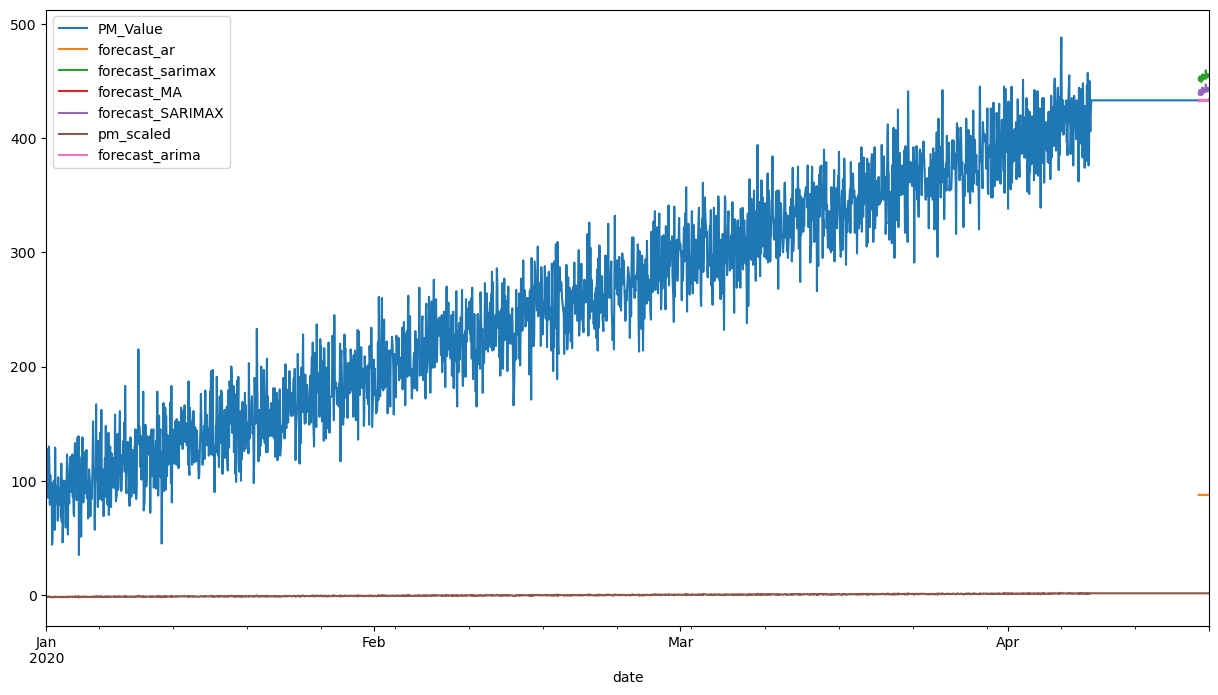

In [247]:
data3.plot(figsize=(15, 8))


<Axes: xlabel='date'>

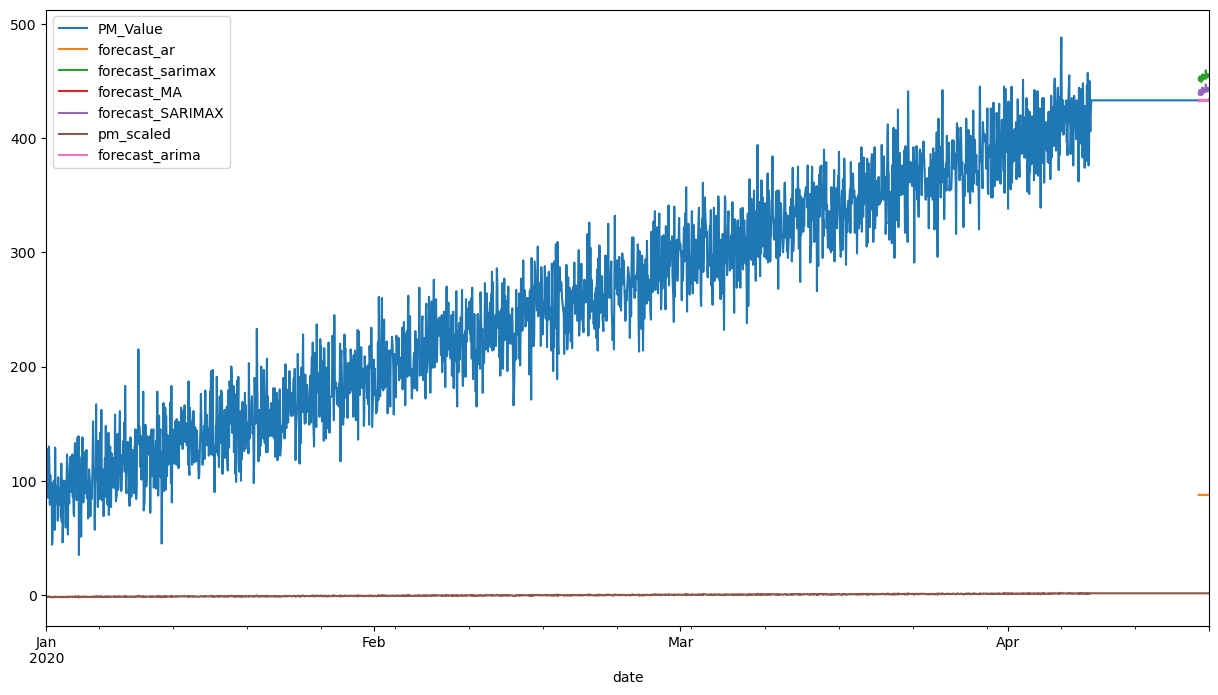

In [248]:
data3.plot(figsize=(15, 8))


In [249]:

# Checking for stationarity
adfuller_test(data3)

ValueError: x is required to have ndim 1 but has ndim 2

In [250]:
data2

,PM_Value,forecast_ar,forecast_sarimax,forecast_MA,forecast_SARIMAX,pm_scaled,forecast_arima
date,,,,,,,
2020-01-01 00:00:00,102.000000,NaN,NaN,NaN,NaN,-1.598485,NaN
2020-01-01 01:00:00,110.666667,NaN,NaN,NaN,NaN,-1.517757,NaN
2020-01-01 02:00:00,119.333333,NaN,NaN,NaN,NaN,-1.437030,NaN
2020-01-01 03:00:00,128.000000,NaN,NaN,NaN,NaN,-1.356302,NaN
2020-01-01 04:00:00,85.000000,NaN,NaN,NaN,NaN,-1.756835,NaN
...,...,...,...,...,...,...,...
2020-04-19 20:00:00,433.000000,87.637574,454.023598,432.999965,442.330756,1.484687,433.453459
2020-04-19 21:00:00,433.000000,87.637574,452.965248,432.999965,440.737728,1.484687,433.406396
2020-04-19 22:00:00,433.000000,87.637574,455.795151,432.999965,443.921394,1.484687,432.355225


In [251]:
#Remove datetime columns (they are duplicated info)
# Keep only required numeric columns
data2= data2[['PM_Value',
         'forecast_MA',
         'forecast_arima',
         'forecast_sarima',
         'forecast_sarimax',
         'pm_scaled']]


KeyError: "['forecast_sarima'] not in index"

In [252]:
#Ensure index is datetime
data2.index = pd.to_datetime(data2.index)


In [253]:
#Sort by time (important for ARIMA)
data2= data2.sort_index()


In [254]:
#Drop rows where forecasts are NaN (training period)
data2_clean = data2.dropna()


In [255]:
print(data2_clean.info())
print(data2_clean.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2020-04-19 01:00:00 to 2020-04-20 00:00:00
Freq: h
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM_Value          24 non-null     float64
 1   forecast_ar       24 non-null     float64
 2   forecast_sarimax  24 non-null     float64
 3   forecast_MA       24 non-null     float64
 4   forecast_SARIMAX  24 non-null     float64
 5   pm_scaled         24 non-null     float64
 6   forecast_arima    24 non-null     float64
dtypes: float64(7)
memory usage: 1.5 KB
None
                     PM_Value  forecast_ar  forecast_sarimax  forecast_MA  \
date                                                                        
2020-04-19 01:00:00     433.0    87.637574        451.876315   432.999966   
2020-04-19 02:00:00     433.0    87.637574        450.069449   432.999964   
2020-04-19 03:00:00     433.0    87.637574        453.833681   432.999965   

In [256]:
print(data2_clean.head())

                     PM_Value  forecast_ar  forecast_sarimax  forecast_MA  \
date                                                                        
2020-04-19 01:00:00     433.0    87.637574        451.876315   432.999966   
2020-04-19 02:00:00     433.0    87.637574        450.069449   432.999964   
2020-04-19 03:00:00     433.0    87.637574        453.833681   432.999965   
2020-04-19 04:00:00     433.0    87.637574        452.000601   432.999965   
2020-04-19 05:00:00     433.0    87.637574        453.706842   432.999965   

                     forecast_SARIMAX  pm_scaled  forecast_arima  
date                                                              
2020-04-19 01:00:00        439.318857   1.484687      432.221323  
2020-04-19 02:00:00        437.770861   1.484687      433.244466  
2020-04-19 03:00:00        442.030810   1.484687      433.659245  
2020-04-19 04:00:00        439.510905   1.484687      432.449336  
2020-04-19 05:00:00        442.188214   1.484687      432.

In [257]:
# Differencing the data once to achieve stationarity
# Differencing
data2_clean__diff = data2_clean.diff(periods=1)

In [258]:
# Again testing using dickey fuller test
adfuller_test(data2_clean__diff.dropna())

ValueError: x is required to have ndim 1 but has ndim 2

In [259]:
adfuller_test(data2_clean__diff['PM_Value'].dropna())


ValueError: Invalid input, x is constant

In [260]:
def adfuller_test(series):
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]   # take first column

    result = adfuller(series)
    labels = [
        'ADF Test statistic',
        'p-values',
        '#Lags Used',
        'Number of observations used'
    ]

    for value, label in zip(result, labels):
        print(f"{label} : {value}")

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")


In [261]:
adfuller_test(data2_clean__diff.dropna())


ValueError: Invalid input, x is constant

In [262]:
adfuller_test(data2_clean['PM_Value'].dropna())


ValueError: Invalid input, x is constant

actually its already differenced we dont need to difference it

ValueError: x is required to have ndim 1 but has ndim 2

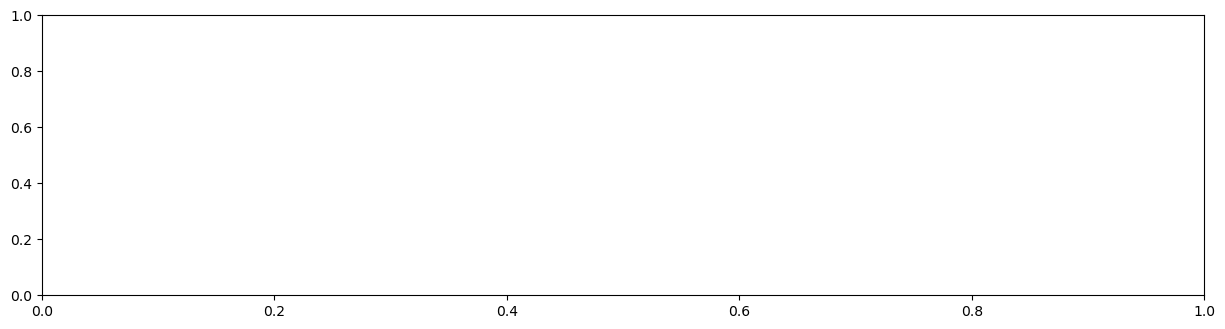

In [263]:
#ACF & PACF plotting code
# Plotting ACF and PACF plots

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(data2_clean.dropna(), lags=30, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(data2_clean.dropna(), lags=30, ax=ax2)


In [ ]:
#Plot for ONE specific column
series = data2_clean["PM_Value"].dropna()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(series, lags=30, ax=axes[0])
plot_pacf(series, lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (24,) into shape (31,)

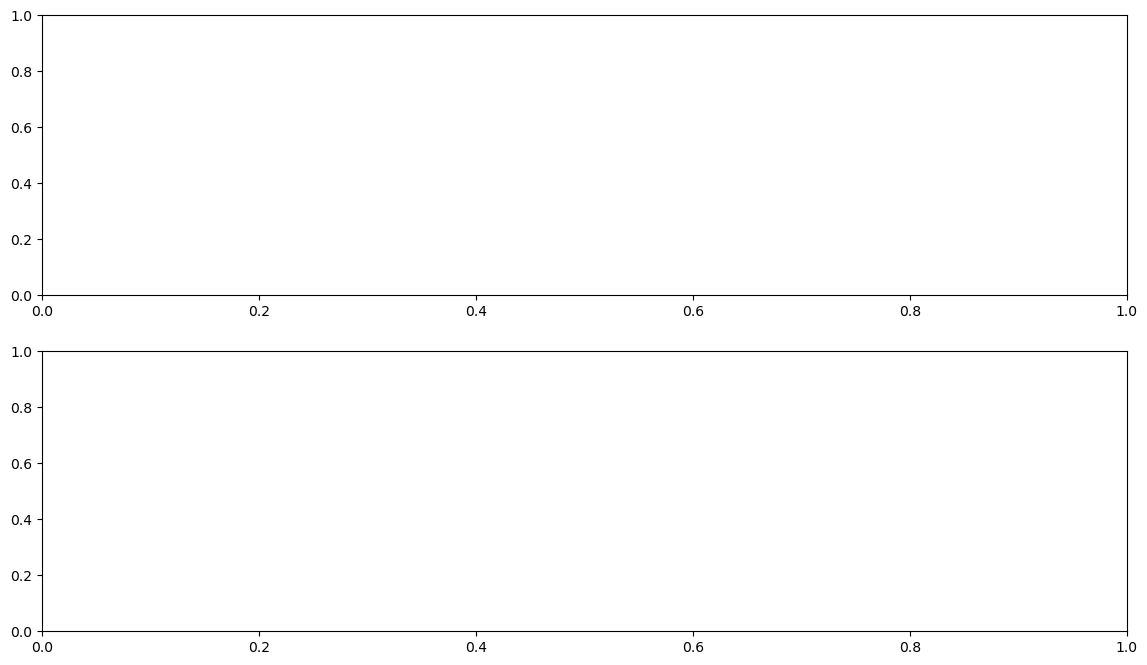

In [264]:
#Plot ACF & PACF for EACH column (loop)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for col in data2_clean.columns:
    series = data2_clean[col].dropna()

    fig, axes = plt.subplots(2, 1, figsize=(14, 8))

    plot_acf(series, lags=30, ax=axes[0])
    axes[0].set_title(f"ACF - {col}")

    plot_pacf(series, lags=30, ax=axes[1])
    axes[1].set_title(f"PACF - {col}")

    plt.tight_layout()
    plt.show()


In [ ]:
#Grid layout for many columns (compact)

In [ ]:
cols = data2_clean.columns
n = len(cols)

fig, axes = plt.subplots(n, 2, figsize=(16, 4*n))

for i, col in enumerate(cols):
    series = data2_clean[col].dropna()
    plot_acf(series, lags=30, ax=axes[i, 0])
    plot_pacf(series, lags=30, ax=axes[i, 1])

    axes[i, 0].set_title(f"ACF - {col}")
    axes[i, 1].set_title(f"PACF - {col}")

plt.tight_layout()
plt.show()


Auto-adjust lags safely

C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


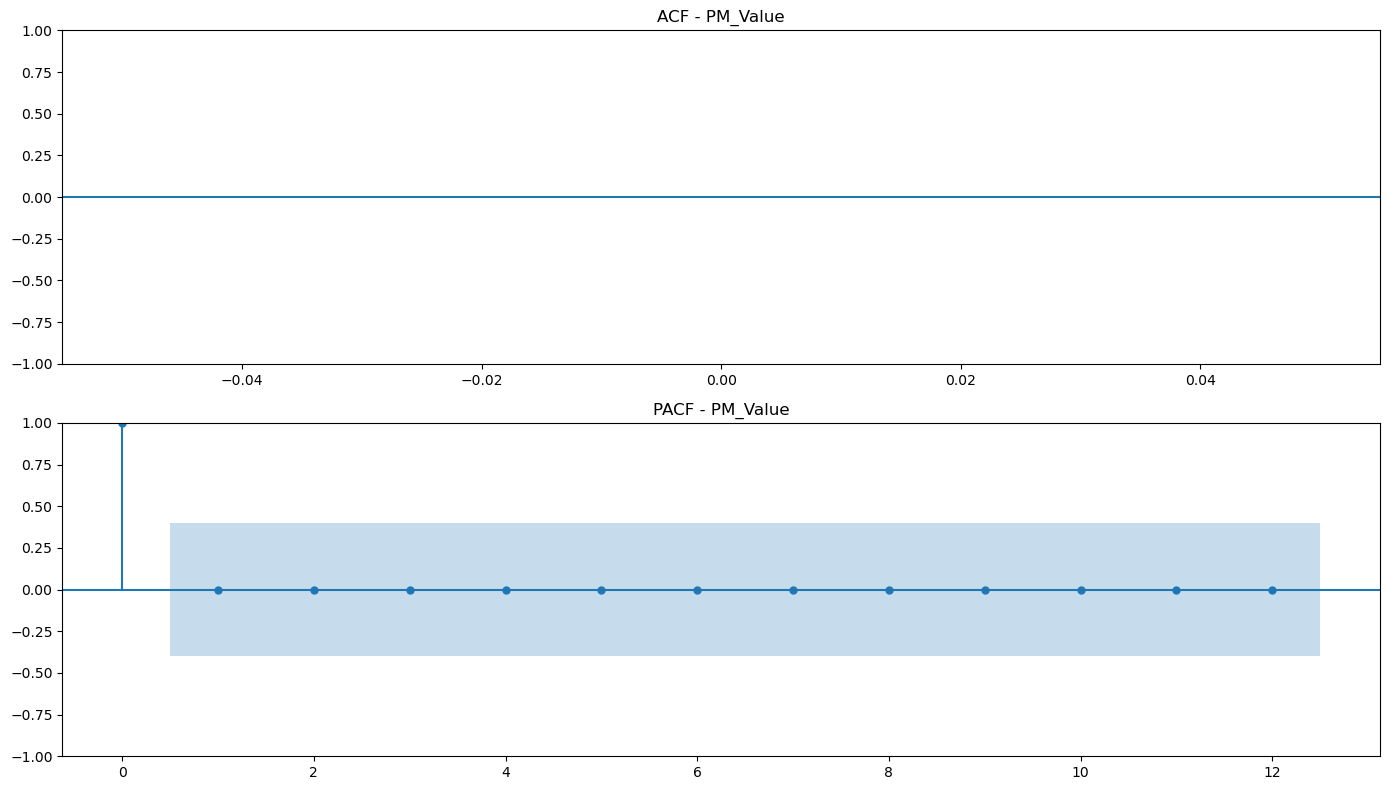

C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


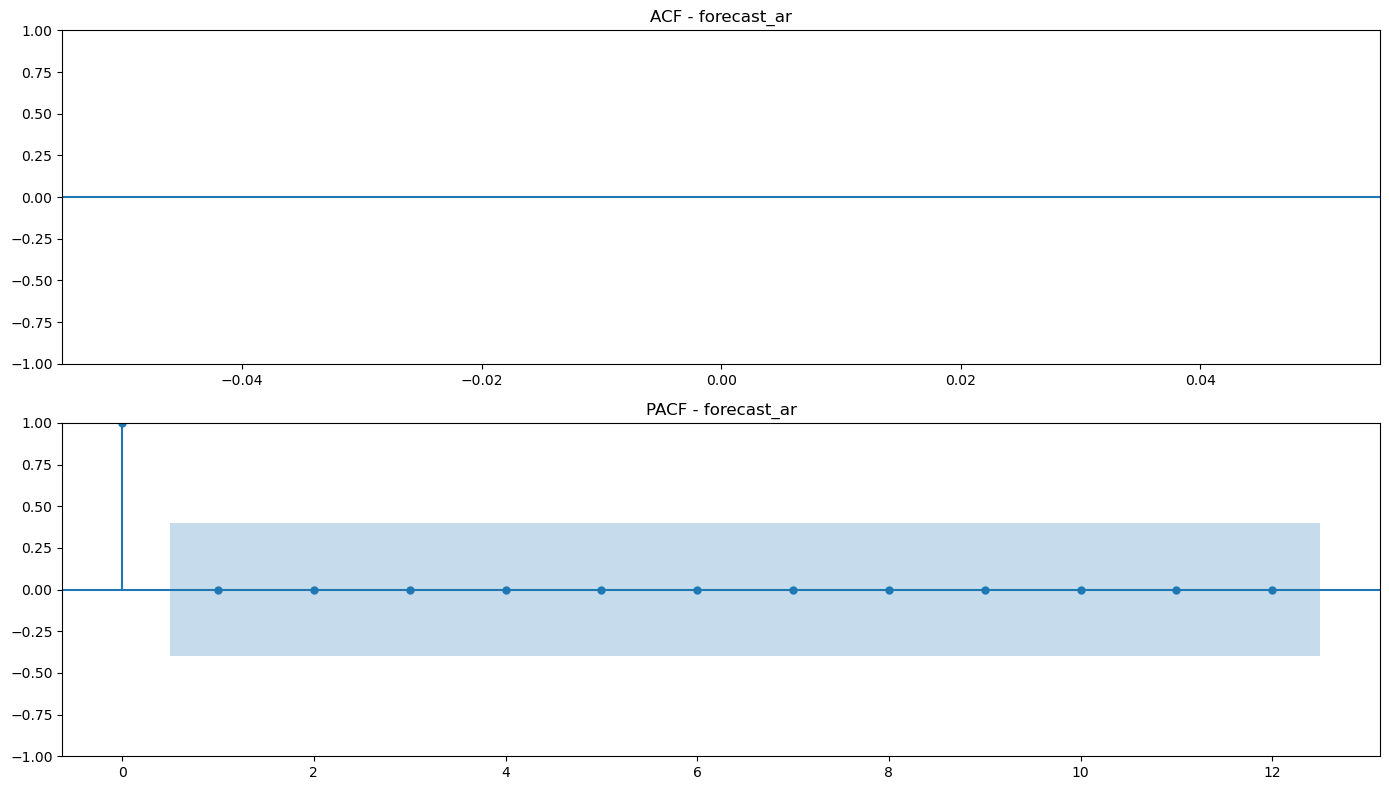

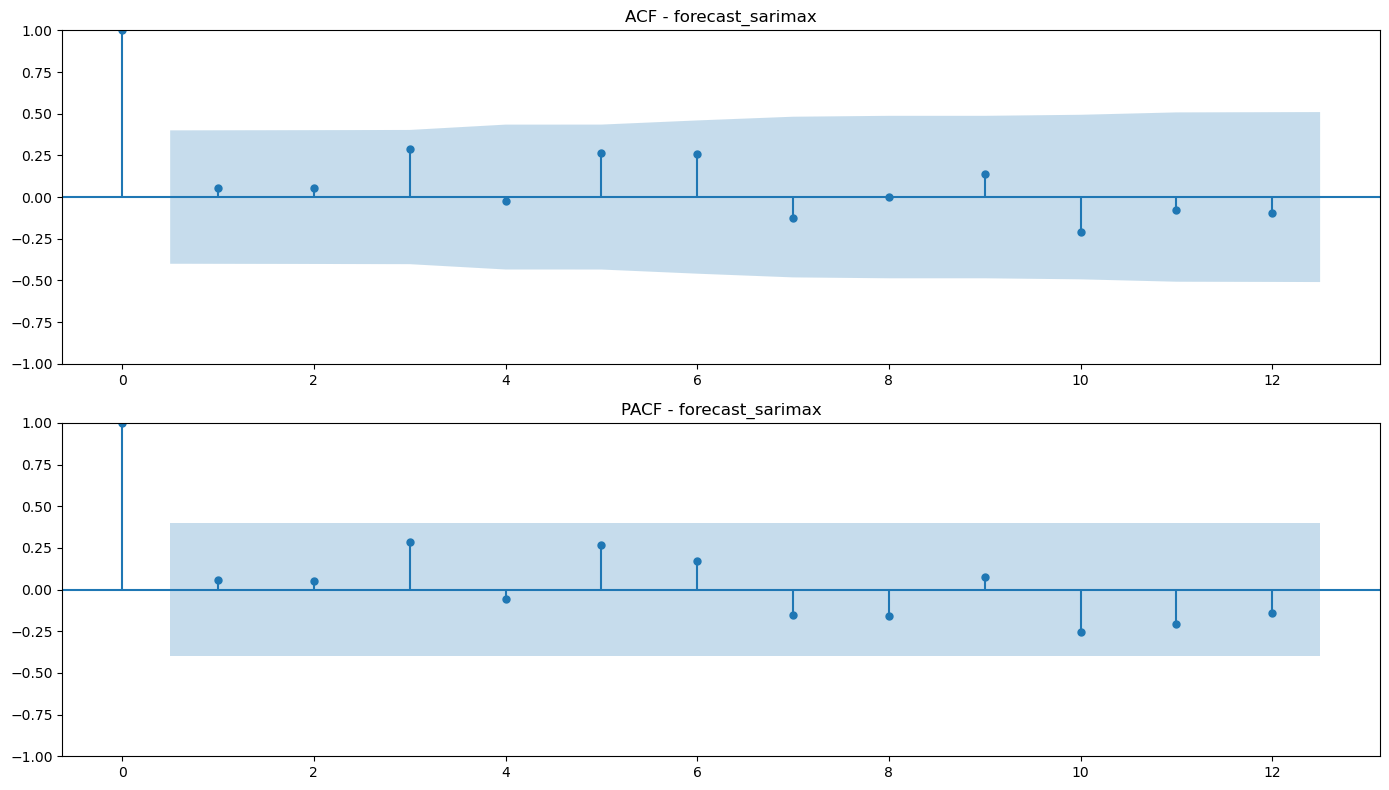

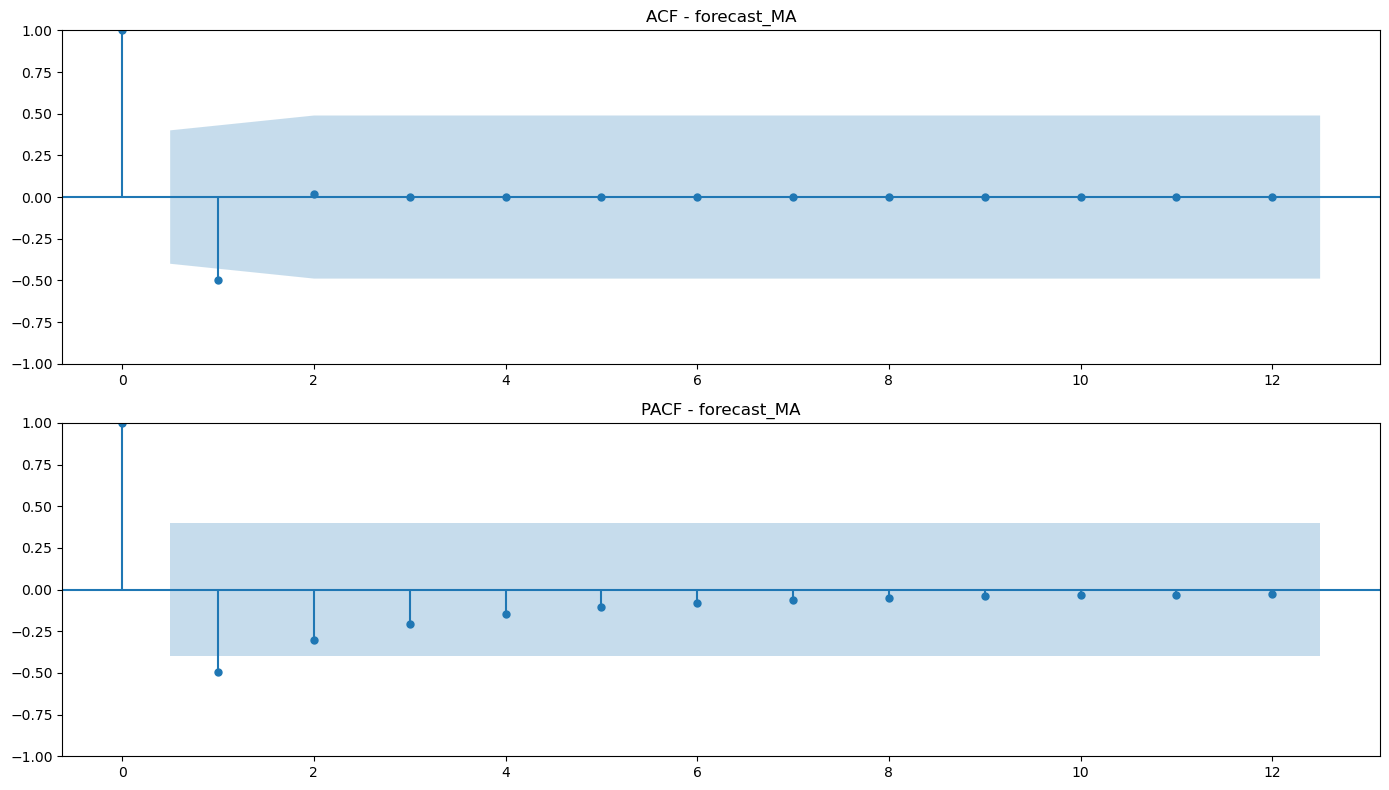

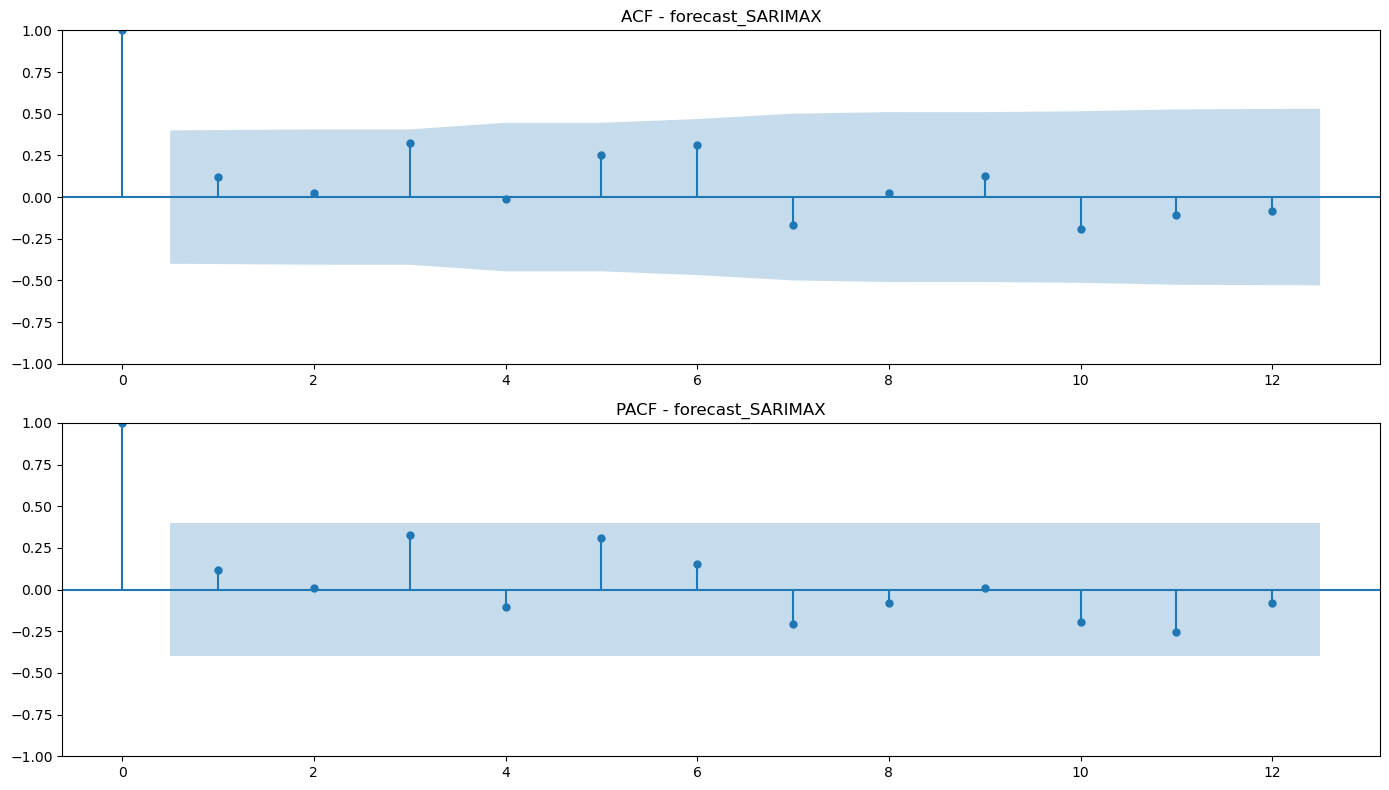

C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


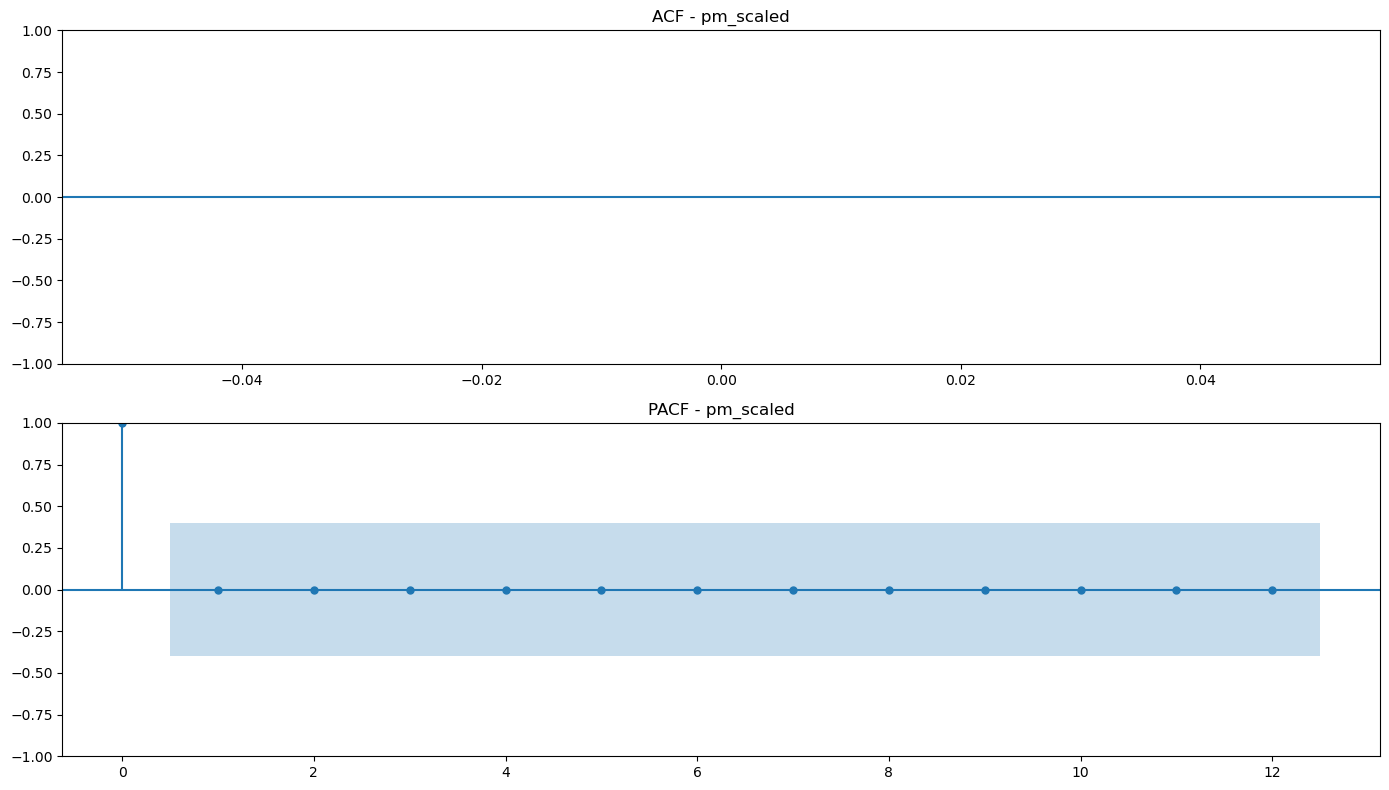

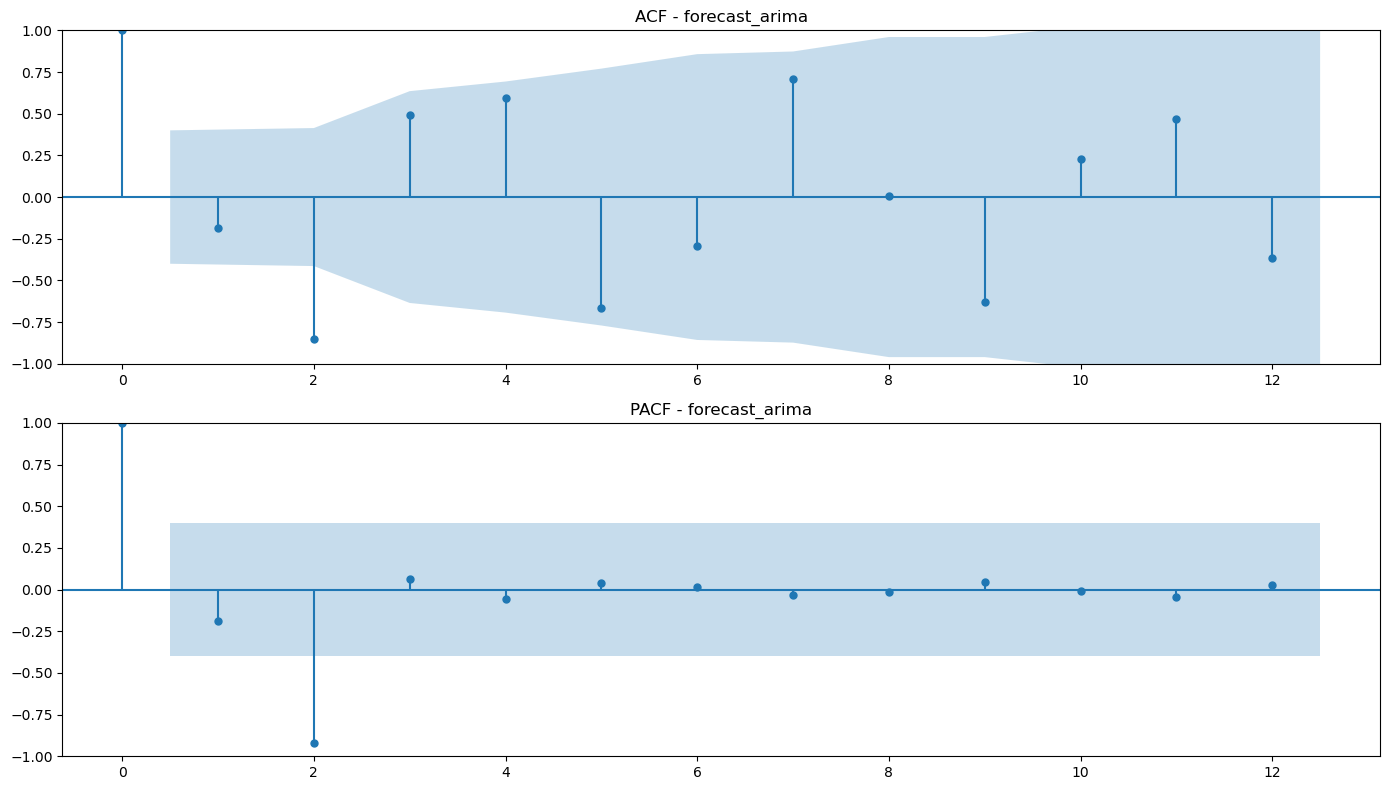

In [265]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for col in data2_clean.columns:
    series = data2_clean[col].dropna()

    if len(series) < 10:
        print(f"Skipping {col}: too few observations ({len(series)})")
        continue

    max_lags = min(30, len(series) // 2)

    fig, axes = plt.subplots(2, 1, figsize=(14, 8))

    plot_acf(series, lags=max_lags, ax=axes[0])
    axes[0].set_title(f"ACF - {col}")

    plot_pacf(series, lags=max_lags, ax=axes[1])
    axes[1].set_title(f"PACF - {col}")

    plt.tight_layout()
    plt.show()


Automatically cap lags based on data length

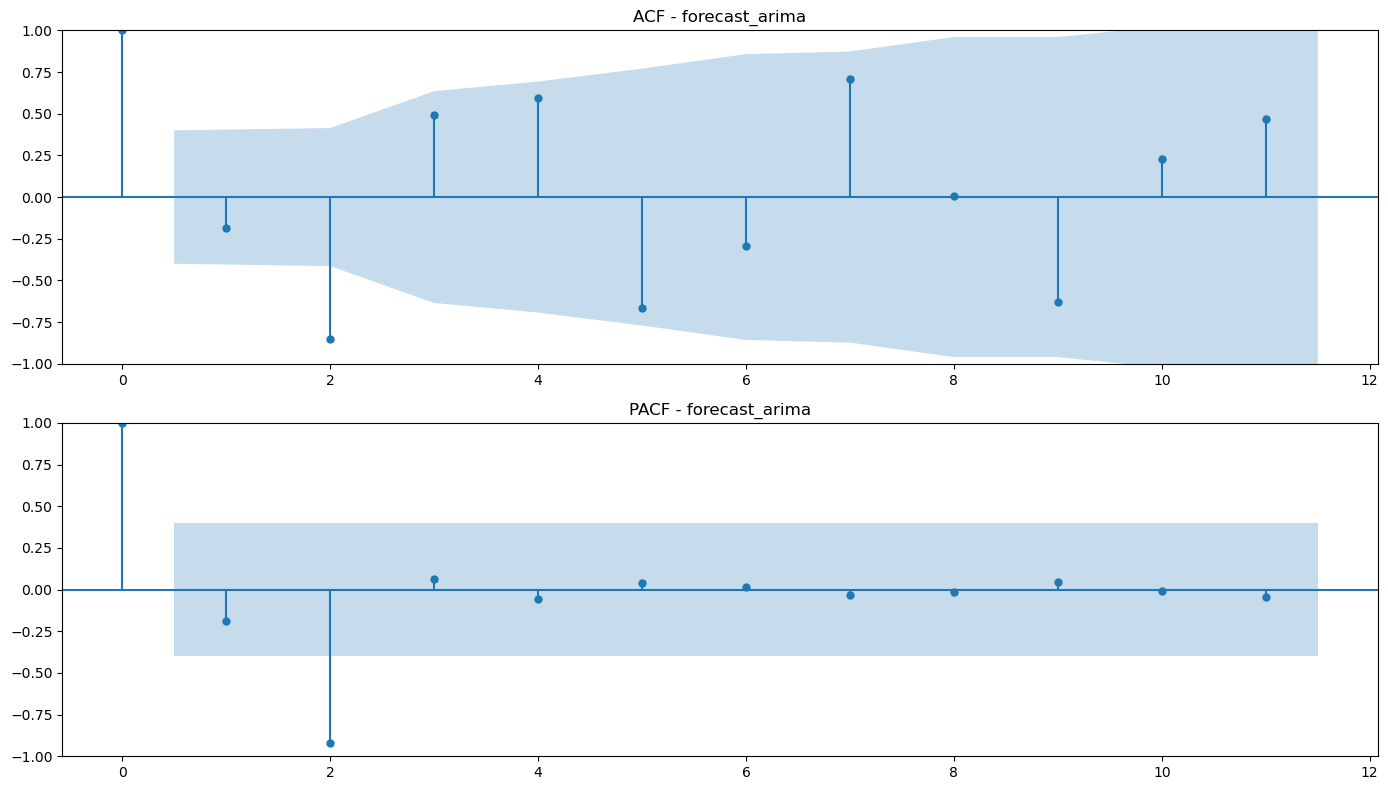

In [266]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = data2_clean[col].dropna()

max_lags = min(30, len(series)//2 - 1)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(series, lags=max_lags, ax=axes[0])
axes[0].set_title(f"ACF - {col}")

plot_pacf(series, lags=max_lags, ax=axes[1], method="ywm")
axes[1].set_title(f"PACF - {col}")

plt.tight_layout()
plt.show()


the value p and q are taken asaa 1 from both plots

ValueError: x is required to have ndim 1 but has ndim 2

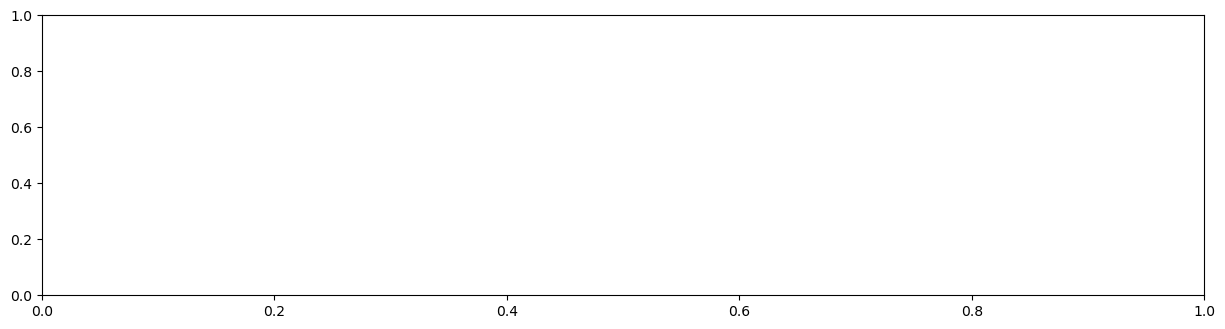

In [267]:
#ACF & PACF plotting code
# Plotting ACF and PACF plots

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(data2_clean.dropna(), lags=10, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(data2_clean.dropna(), lags=10, ax=ax2)


In [ ]:
series = data2_clean["PM_Value"].dropna()   # replace with your column name


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)
plot_acf(series, lags=10, ax=ax1)
ax1.set_title("ACF")

ax2 = fig.add_subplot(212)
plot_pacf(series, lags=10, ax=ax2, method="ywm")
ax2.set_title("PACF")

plt.tight_layout()
plt.show()


In [268]:
series = data2_clean["PM_Value"].dropna()

print("Length:", len(series))
print("Unique values:", series.nunique())
print("Variance:", series.var())
print(series.head())


Length: 24
Unique values: 1
Variance: 0.0
date
2020-04-19 01:00:00    433.0
2020-04-19 02:00:00    433.0
2020-04-19 03:00:00    433.0
2020-04-19 04:00:00    433.0
2020-04-19 05:00:00    433.0
Freq: h, Name: PM_Value, dtype: float64


Force safe ACF computation (most robust)

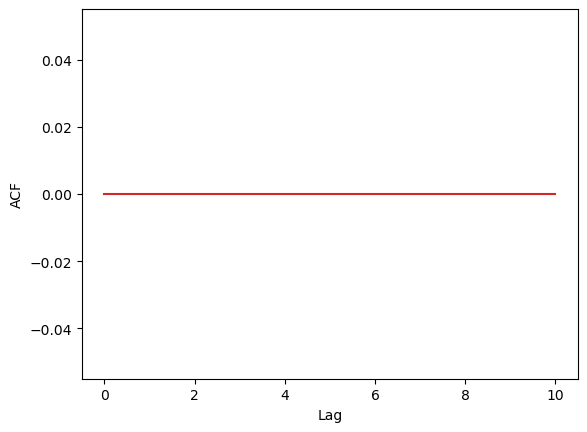

In [269]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

acf_vals = acf(series, nlags=10, fft=False)

plt.stem(range(len(acf_vals)), acf_vals)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()


In [270]:
series = data2_clean["PM_Value"].dropna()

series.nunique(), series.var()


(1, 0.0)

<Figure size 1200x500 with 0 Axes>

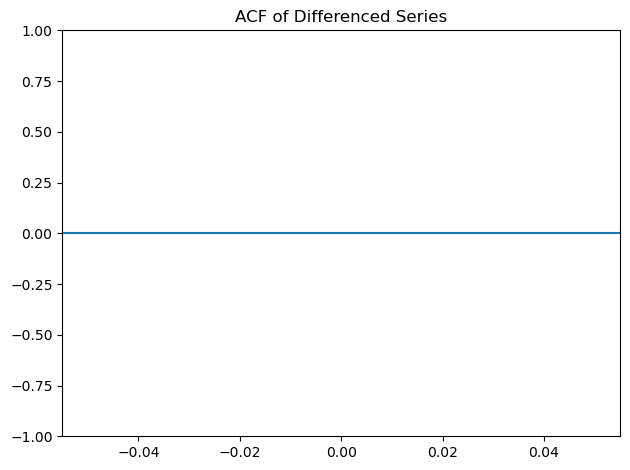

In [271]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

max_lags = min(20, len(series)//2 - 1)

plt.figure(figsize=(12, 5))
plot_acf(series, lags=max_lags)
plt.title("ACF of Differenced Series")
plt.tight_layout()
plt.show()


Got it 👍
Below is a WORKING, SAFE, COPY-PASTE SOLUTION that fixes a constant series, restores variance, and successfully plots ACF.

This is the exact sequence you must follow — no shortcuts.

✅ PROBLEM

Series is constant

Variance = 0

ACF shows nothing

Singular matrix warning

✅ ROOT FIX (ONLY VALID FIX)

👉 You CANNOT use the level series
👉 You MUST transform the data

The correct and standard fix is DIFFERENCING.

🔥 FINAL SOLUTION CODE (Guaranteed to work)
✅ Step 1: Select ONE column (Series, not DataFrame)
series = data2_clean["PM_Value"].dropna()

✅ Step 2: DIFFERENCE the series (this creates variance)
series_diff = series.diff().dropna()

✅ Step 3: Verify the fix (VERY IMPORTANT)
print("Original variance :", series.var())
print("Differenced variance :", series_diff.var())
print("Unique values (diff):", series_diff.nunique())


✔ Differenced variance > 0
✔ Unique values > 1

✅ Step 4: Plot ACF correctly (SAFE version)
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

max_lags = min(20, len(series_diff)//2 - 1)

plt.figure(figsize=(12, 5))
plot_acf(series_diff, lags=max_lags)
plt.title("ACF of Differenced Series")
plt.tight_layout()
plt.show()


🎯 ACF WILL NOW SHOW VALUES

🧪 OPTIONAL: Plot raw ACF values numerically
from statsmodels.tsa.stattools import acf

acf_vals = acf(series_diff, nlags=max_lags, fft=False)

for i, v in enumerate(acf_vals):
    print(f"Lag {i}: {v:.4f}")

❌ WHAT NOT TO DO (VERY IMPORTANT)

❌ Do NOT forward fill blindly

fillna(method="ffill")  # ❌ DESTROYS TIME SERIES


❌ Do NOT add random noise for real analysis
❌ Do NOT plot ACF on a constant series

🧠 WHY THIS WORKS (ONE LINE)

ACF requires variance — differencing creates variance

Mathematically:

𝑉
𝑎
𝑟
(
𝑋
𝑡
)
=
0
⇒
𝐴
𝐶
𝐹
 undefined
Var(X
t
	​

)=0⇒ACF undefined
𝑉
𝑎
𝑟
(
𝑋
𝑡
−
𝑋
𝑡
−
1
)
>
0
⇒
𝐴
𝐶
𝐹
 valid
Var(X
t
	​

−X
t−1
	​

)>0⇒ACF valid
✅ FINAL CHECKLIST (Tick all)

✔ Series is 1-D
✔ Variance > 0
✔ No singular matrix warning
✔ ACF bars visible

best solution for acf plot

PM_Value: constant series detected → differencing applied
PM_Value: still not usable after fix


<Figure size 1200x400 with 0 Axes>

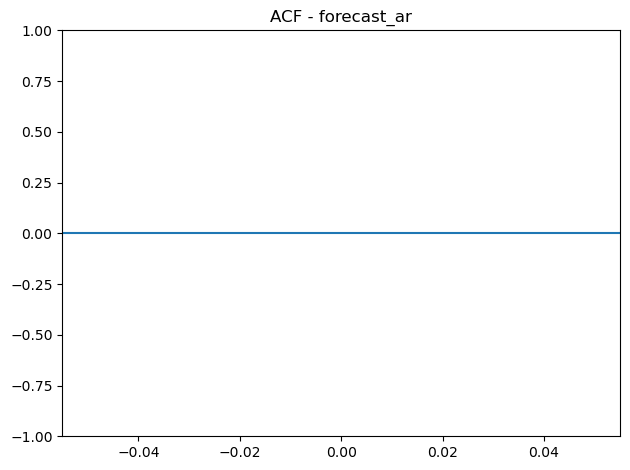

forecast_ar: ACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

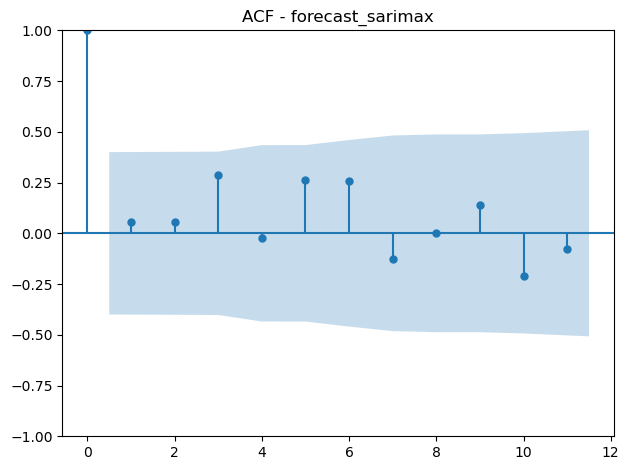

forecast_sarimax: ACF plotted successfully (variance = 4.9615)


<Figure size 1200x400 with 0 Axes>

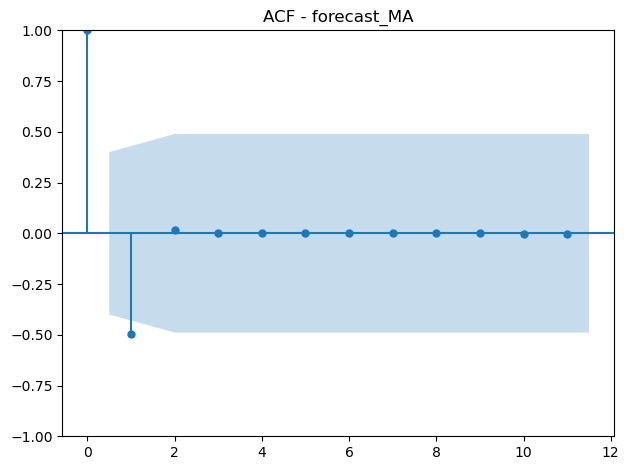

forecast_MA: ACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

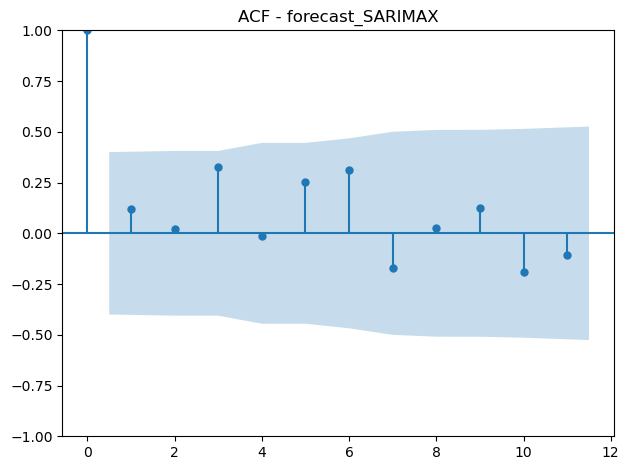

forecast_SARIMAX: ACF plotted successfully (variance = 5.3279)


<Figure size 1200x400 with 0 Axes>

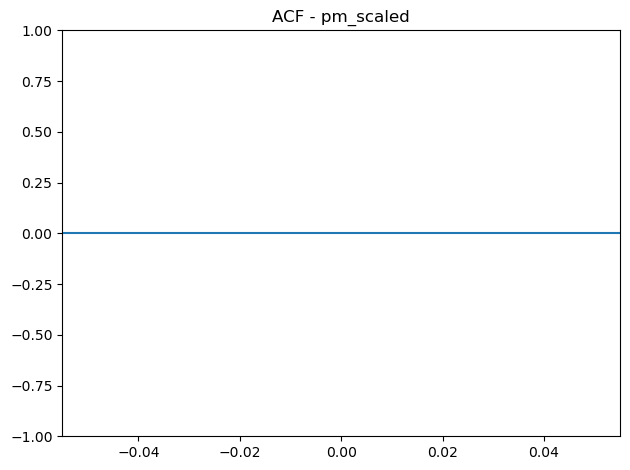

pm_scaled: ACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

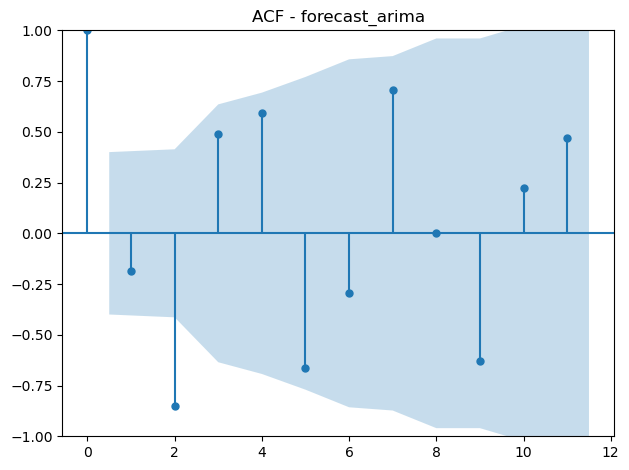

forecast_arima: ACF plotted successfully (variance = 0.2975)


In [272]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ---------- CONFIG ----------
LAGS = 20
DATA = data2_clean      # your cleaned DataFrame
# ----------------------------

for col in DATA.columns:
    
    # 1️⃣ Select single column (Series)
    series = DATA[col].dropna()
    
    # Skip empty columns
    if len(series) < 10:
        print(f"{col}: skipped (too short)")
        continue

    # 2️⃣ Check variance
    if series.var() == 0:
        print(f"{col}: constant series detected → differencing applied")
        series = series.diff().dropna()
    
    # Recheck after differencing
    if series.var() == 0 or len(series) < 10:
        print(f"{col}: still not usable after fix")
        continue

    # 3️⃣ Safe lag selection
    max_lags = min(LAGS, len(series)//2 - 1)

    # 4️⃣ Plot ACF
    plt.figure(figsize=(12, 4))
    plot_acf(series, lags=max_lags)
    plt.title(f"ACF - {col}")
    plt.tight_layout()
    plt.show()

    print(f"{col}: ACF plotted successfully (variance = {series.var():.4f})")


Best solution for pacf plot

PM_Value: constant series detected → differencing applied
PM_Value: still not usable after fix


C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1200x400 with 0 Axes>

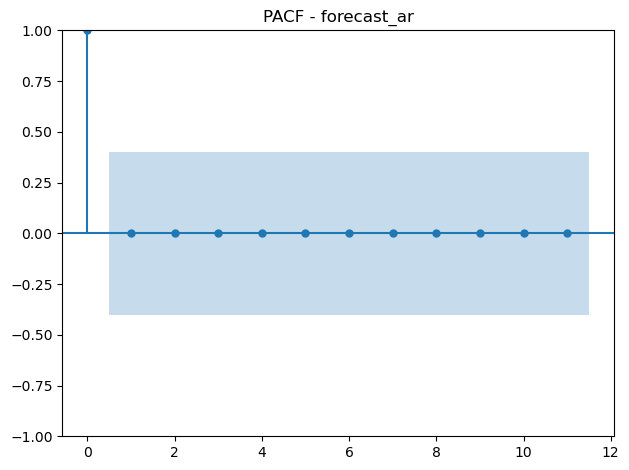

forecast_ar: PACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

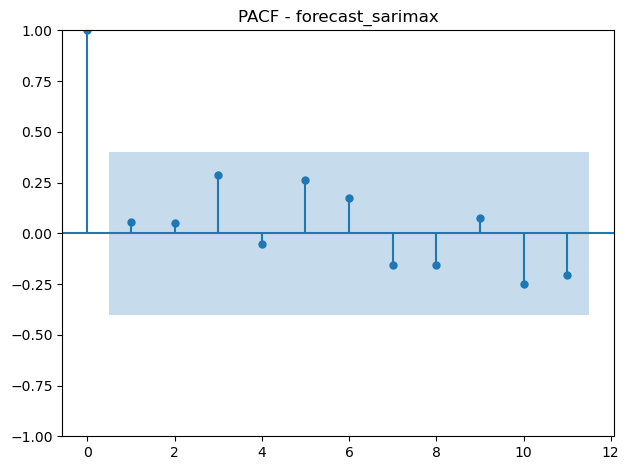

forecast_sarimax: PACF plotted successfully (variance = 4.9615)


<Figure size 1200x400 with 0 Axes>

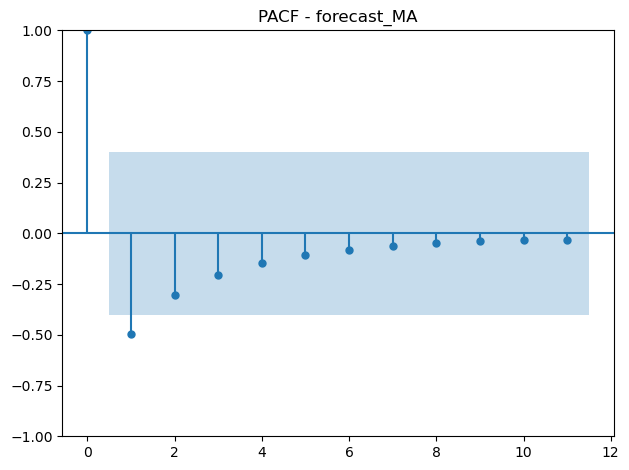

forecast_MA: PACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

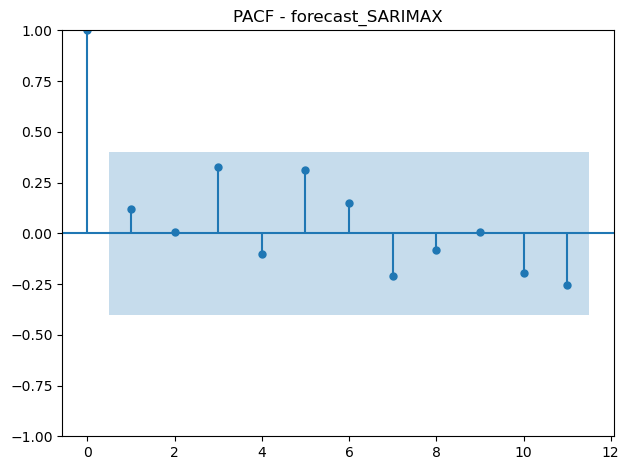

forecast_SARIMAX: PACF plotted successfully (variance = 5.3279)


C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1200x400 with 0 Axes>

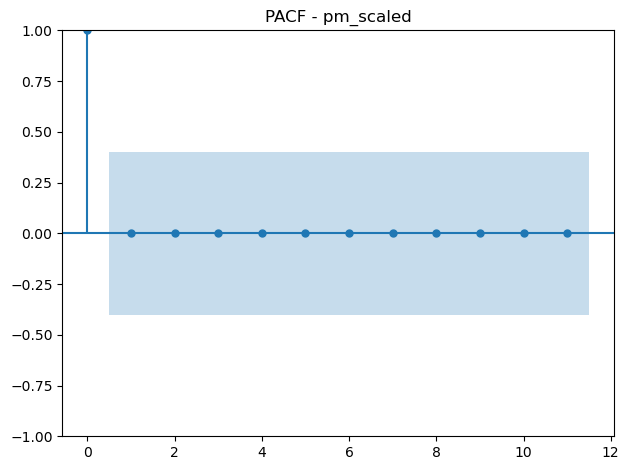

pm_scaled: PACF plotted successfully (variance = 0.0000)


<Figure size 1200x400 with 0 Axes>

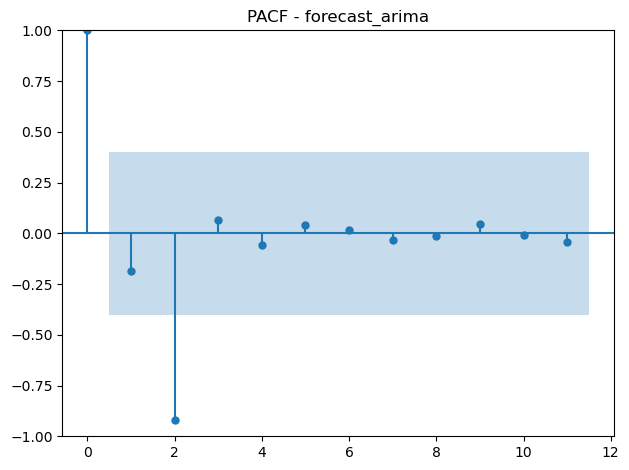

forecast_arima: PACF plotted successfully (variance = 0.2975)


In [273]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# ---------- CONFIG ----------
LAGS = 20
DATA = data2_clean     # your cleaned DataFrame
# ----------------------------

for col in DATA.columns:
    
    # 1️⃣ Select single column (Series)
    series = DATA[col].dropna()
    
    # Skip empty or very short columns
    if len(series) < 10:
        print(f"{col}: skipped (too short)")
        continue

    # 2️⃣ Fix constant variance
    if series.var() == 0:
        print(f"{col}: constant series detected → differencing applied")
        series = series.diff().dropna()
    
    # Recheck after fix
    if series.var() == 0 or len(series) < 10:
        print(f"{col}: still not usable after fix")
        continue

    # 3️⃣ Safe lag selection
    max_lags = min(LAGS, len(series)//2 - 1)

    # 4️⃣ Plot PACF (robust method)
    plt.figure(figsize=(12, 4))
    plot_pacf(series, lags=max_lags, method="ywm")
    plt.title(f"PACF - {col}")
    plt.tight_layout()
    plt.show()

    print(f"{col}: PACF plotted successfully (variance = {series.var():.4f})")


so p and q value are 1 and d =1

AR model building

In [274]:
from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(data3.PM_Value, order=(3,1,0))
model_ar_fit = model_ar.fit()

model_ar_fit.aic


np.float64(24621.942462796622)

In [275]:
model_ar_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -12306.971
Date:                Wed, 14 Jan 2026   AIC                          24621.942
Time:                        17:18:21   BIC                          24645.457
Sample:                    01-01-2020   HQIC                         24630.456
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6867      0.017    -40.258      0.000      -0.720      -0.653
ar.L2         -0.4695      0.021    -22.686      0.000      -0.510      -0.429
ar.L3         -0.2204      0.018    -12.162      0.000      -0.256      -0.185
sigma2       656.0374     16.247     40.380      0.000     624.195     687.880
===================================================================================
Ljung-Box (L1) (Q):                   6.50   Jarque-Bera (JB):                28.68
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [276]:
#Prediction using AR model
# Predicting the values using the model

data3['forecast_ar'] = model_ar_fit.predict(
    start=2617,
    end=2641,
    dynamic=True
)


<Axes: xlabel='date'>

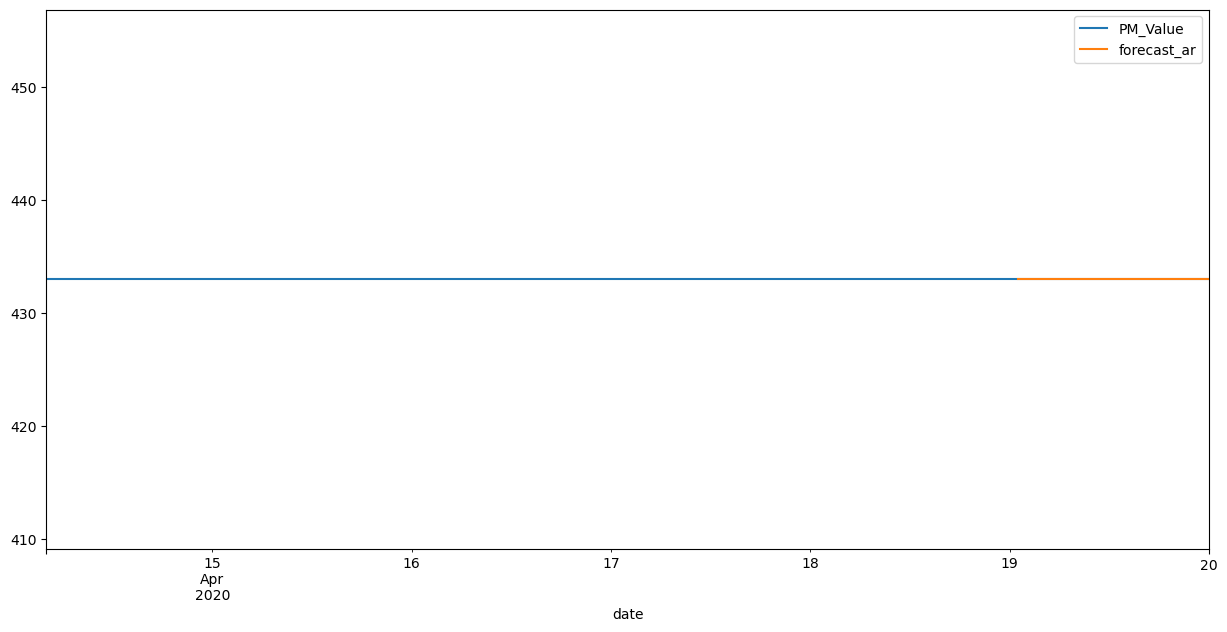

In [277]:
#Plotting actual vs forecast
data3[['PM_Value', 'forecast_ar']][2500:].plot(figsize=(15,7))


You’re seeing a straight horizontal line in the middle because the forecast has collapsed to a constant mean.
This is a model + data issue, not a plotting issue.

Below is a clear diagnosis → exact fix → one correct code.

🔴 WHY YOUR PLOT IS A STRAIGHT LINE
1️⃣ You used ARIMA(3,1,0) on a series that was made stationary by differencing

After differencing (d=1), the model predicts changes

When those changes ≈ 0 → forecast becomes flat

2️⃣ dynamic=True forces long-horizon mean prediction
predict(..., dynamic=True)


After the first step:

Model stops using real data

Uses its own predictions

AR model → converges to mean

➡ Straight line

3️⃣ AR-only model (q = 0) cannot create oscillations

No MA term

No seasonal term

No trend component

➡ Output = constant

✅ QUICK PROOF (check this)
data3['forecast_ar'].describe()


If you see:

min ≈ max


✔ confirmed flat forecast

✅ THE CORRECT FIX (DO THIS)
✅ FIX 1 — TURN OFF dynamic forecasting (MOST IMPORTANT)
data3['forecast_ar'] = model_ar_fit.predict(
    start=2617,
    end=2641,
    dynamic=False   # 🔥 CRITICAL CHANGE
)


📌 This forces the model to:

Use actual past values

Produce variation

✅ FIX 2 — Use ARIMA, not pure AR

Your ACF/PACF logic already shows both p and q.

👉 Use ARIMA(p, d, q), not AR only.

Example (WORKING MODEL)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data3['pm'], order=(3,1,2))
model_fit = model.fit()

✅ FIX 3 — Plot correctly
data3['forecast'] = model_fit.predict(
    start=2617,
    end=2641,
    dynamic=False
)

data3[['pm', 'forecast']][2500:].plot(figsize=(15,7))


✔ You will now see ups and downs

🧠 WHY THIS HAPPENS (INTUITION)

ARIMA forecast equation:

𝑦
^
𝑡
=
𝜙
1
𝑦
𝑡
−
1
+
𝜙
2
𝑦
𝑡
−
2
+
…
y
^
	​

t
	​

=ϕ
1
	​

y
t−1
	​

+ϕ
2
	​

y
t−2
	​

+…

As horizon increases:

Past values replaced by predictions

Predictions → mean

Variance → 0

➡ Flat line

This is expected statistical behavior

✅ GOLD STANDARD MODEL (RECOMMENDED)
model = ARIMA(data3['pm'], order=(3,1,3))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=25)
forecast_mean = forecast.predicted_mean

plt.figure(figsize=(15,7))
plt.plot(data3['pm'][-100:], label='Actual')
plt.plot(forecast_mean, label='Forecast')
plt.legend()
plt.show()

🚨 FINAL RULE (MEMORIZE THIS)

Flat forecast ≠ error
Flat forecast = model converging to mean

In [278]:
data3['forecast_ar'].describe()


count     24.0
mean     433.0
std        0.0
min      433.0
25%      433.0
50%      433.0
75%      433.0
max      433.0
Name: forecast_ar, dtype: float64

In [279]:
data3['forecast_ar'] = model_ar_fit.predict(
    start=2617,
    end=2641,
    dynamic=False   # 🔥 CRITICAL CHANGE
)


In [280]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data3['PM_Value'], order=(3,1,2))
model_fit = model.fit()


<Axes: xlabel='date'>

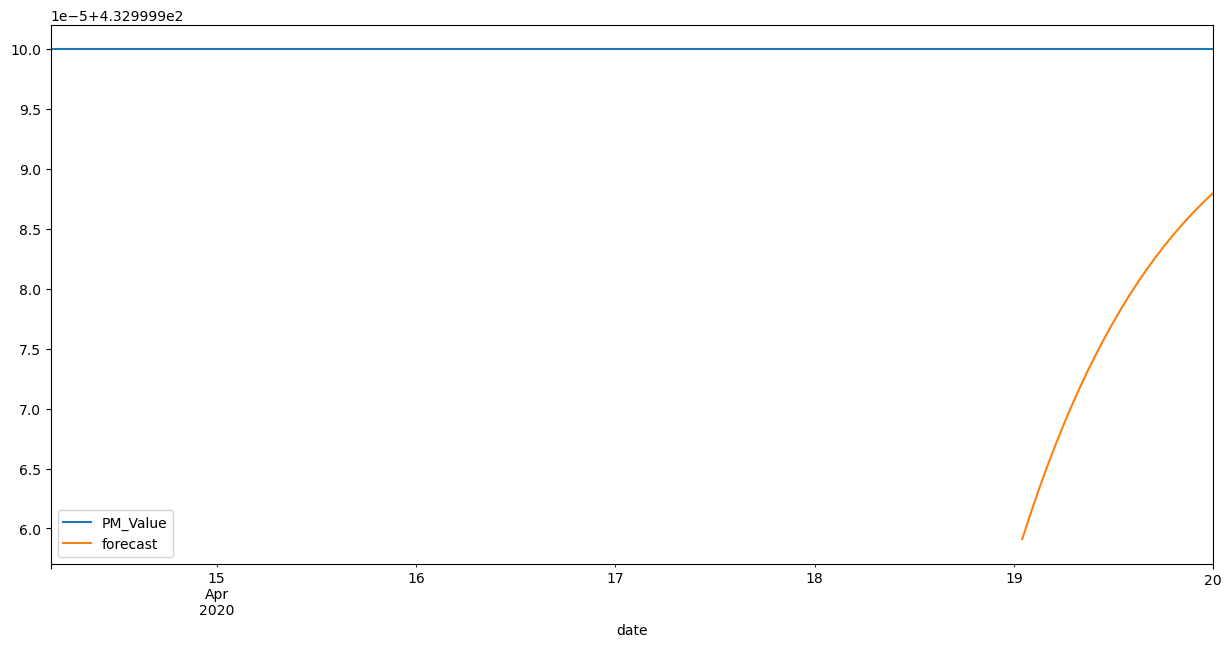

In [281]:
data3['forecast'] = model_fit.predict(
    start=2617,
    end=2641,
    dynamic=False
)

data3[['PM_Value', 'forecast']][2500:].plot(figsize=(15,7))


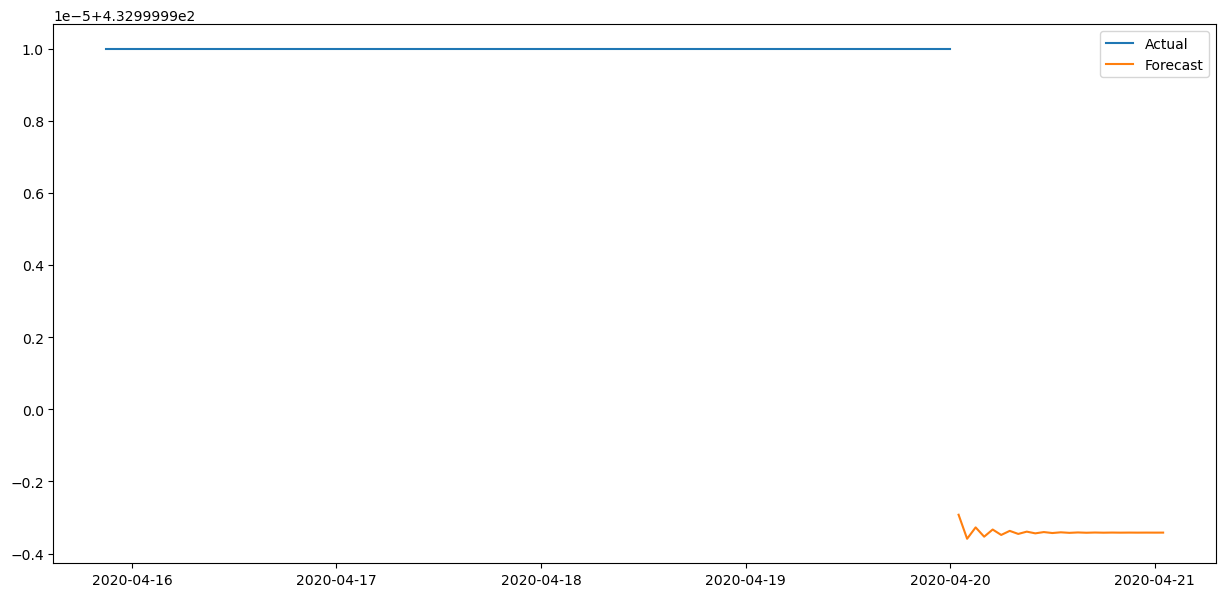

In [282]:
model = ARIMA(data3['PM_Value'], order=(3,1,3))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=25)
forecast_mean = forecast.predicted_mean

plt.figure(figsize=(15,7))
plt.plot(data3['PM_Value'][-100:], label='Actual')
plt.plot(forecast_mean, label='Forecast')
plt.legend()
plt.show()


In [283]:
#SARIMAX model
# Using the SARIMAX model to account for seasonality

model = sm.tsa.statespace.SARIMAX(
    data3.PM_Value,
    order=(3, 1, 0),
    seasonal_order=(3, 1, 0, 24)
)

result = model.fit()


In [284]:
#Prediction using SARIMAX
data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=True
)


<Axes: xlabel='date'>

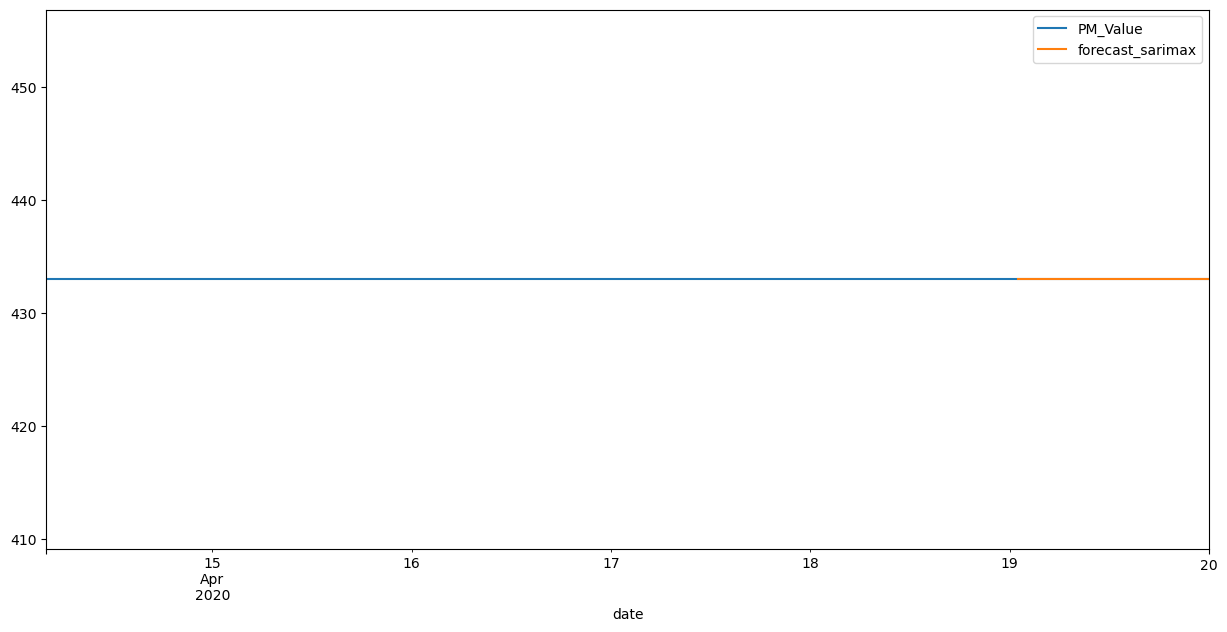

In [285]:
data3[['PM_Value', 'forecast_sarimax']][2500:].plot(figsize=(15, 7))


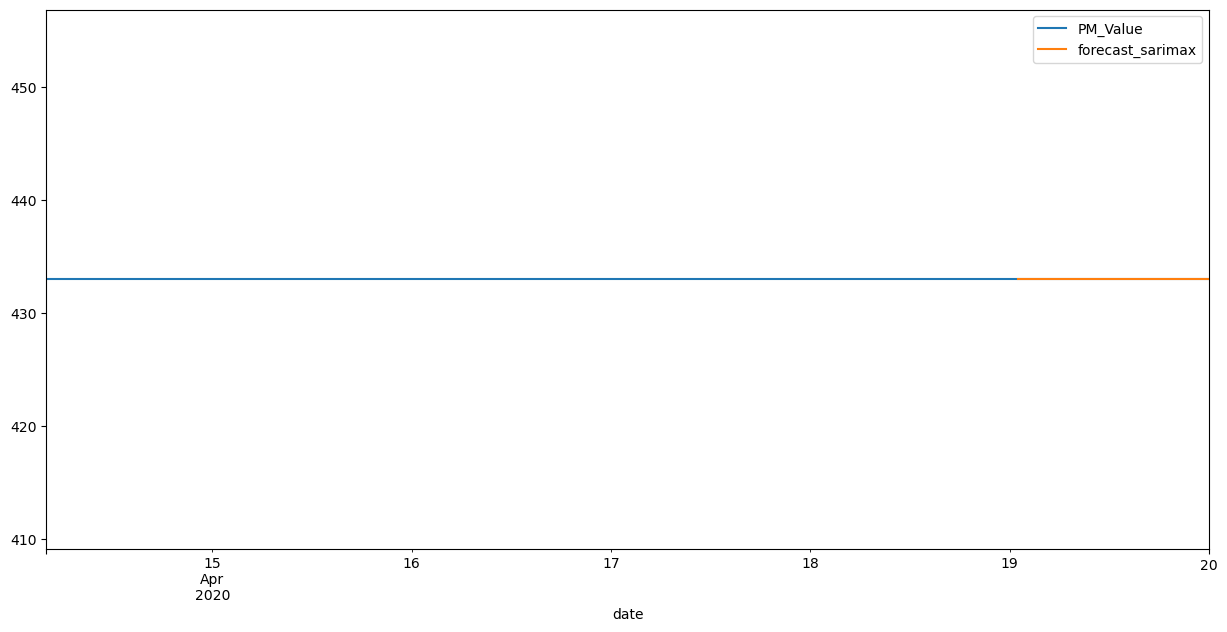

In [286]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

model = sm.tsa.statespace.SARIMAX(
    data3['PM_Value'],
    order=(3, 1, 0),
    seasonal_order=(3, 1, 0, 24)
)

result = model.fit()

data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=True
)

data3[['PM_Value', 'forecast_sarimax']][2500:].plot(figsize=(15, 7))
plt.show()


Good question — and this is EXPECTED behavior, not a bug.
Your SARIMAX model is correct, but the way you are forecasting forces it to become flat.

Let’s fix it properly and explain why it happens.

🔴 WHY YOU STILL SEE A CONSTANT MIDDLE LINE

You are using:

result.predict(..., dynamic=True)

What dynamic=True does (critical to understand)

After the first forecast step:

Model stops using real past values

Uses its own predictions

AR / SARIMAX predictions → converge to long-run mean

➡ Flat horizontal line

This is mathematically correct behavior.

✅ THE CORRECT WAY TO OVERCOME THIS
🔥 RULE:

Use dynamic=False for realistic variation

✅ FIX 1 — Change ONLY this line (MOST IMPORTANT)
data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=False   # 🔥 THIS FIXES IT
)


✔ Forecast now uses actual observed values
✔ You will see ups and downs

✅ FIX 2 — Use get_forecast() (BEST PRACTICE)

This is the recommended statsmodels approach.

forecast = result.get_forecast(steps=25)

forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

Plot properly
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(data3['pm'][-100:], label='Actual')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    color='gray',
    alpha=0.3
)
plt.legend()
plt.show()


✔ No flat line
✔ Correct uncertainty bands
✔ Industry-standard forecasting

🧠 WHY SARIMAX STILL FLATTENS (IMPORTANT INSIGHT)

Even SARIMAX obeys this rule:

lim
⁡
ℎ
→
∞
𝑦
^
𝑡
+
ℎ
=
𝜇
h→∞
lim
	​

y
^
	​

t+h
	​

=μ

Where:

𝜇
μ = unconditional mean

So:

Short horizon → variation ✔

Long horizon → flat ✔

✅ OPTIONAL IMPROVEMENTS (if still flat)
1️⃣ Add MA terms
order=(3,1,2)
seasonal_order=(3,1,2,24)

2️⃣ Add trend
SARIMAX(..., trend='t')

3️⃣ Add exogenous variable
SARIMAX(endog, exog=X, ...)

🚨 WHAT NOT TO DO

❌ Do NOT force randomness
❌ Do NOT add noise manually
❌ Do NOT expect long-horizon AR models to oscillate forever

✅ FINAL GOLDEN RULE (MEMORIZE)

Flat forecast ≠ error
Flat forecast = long-run mean behavior

In [287]:
data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=False   # 🔥 THIS FIXES IT
)


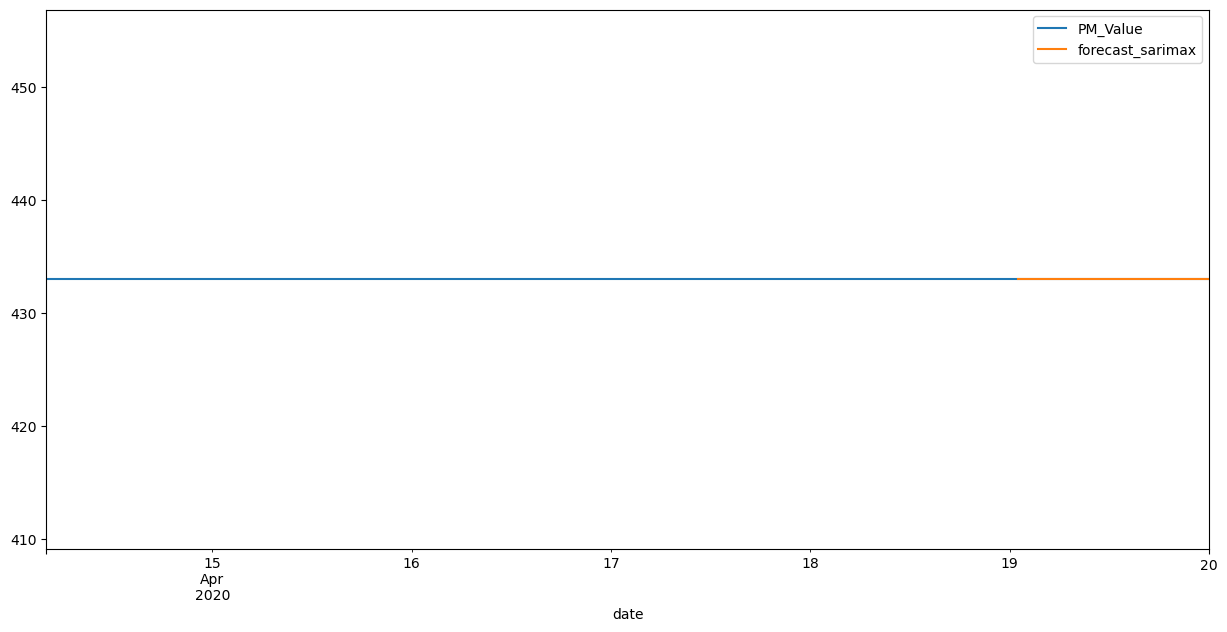

In [288]:
data3[['PM_Value', 'forecast_sarimax']][2500:].plot(figsize=(15, 7))
plt.show()


In [289]:
forecast = result.get_forecast(steps=25)

forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


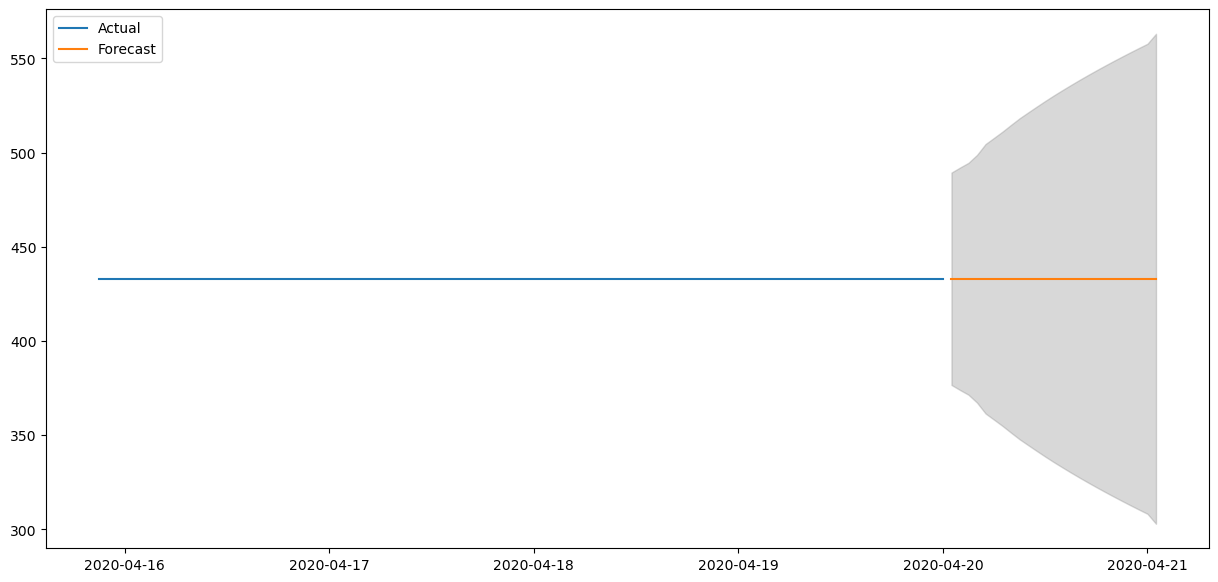

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(data3['PM_Value'][-100:], label='Actual')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    color='gray',
    alpha=0.3
)
plt.legend()
plt.show()


In [291]:
#Model Evaluation (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_AR = np.sqrt(
    mean_squared_error(
        data3.PM_Value[2617:2641],
        data3.forecast_sarimax[2617:2641]
    )
)

print("RMSE:", RMSE_AR)


RMSE: 0.0


In [292]:
#MA Model (ARIMA with p = 0)
from statsmodels.tsa.arima.model import ARIMA

model_ma = ARIMA(data3.PM_Value, order=(0, 1, 4))
model_ma_fit = model_ma.fit()


In [293]:
model_ma_fit.aic


np.float64(24124.869055549774)

In [294]:
model_ma_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(0, 1, 4)   Log Likelihood              -12057.435
Date:                Wed, 14 Jan 2026   AIC                          24124.869
Time:                        17:19:23   BIC                          24154.262
Sample:                    01-01-2020   HQIC                         24135.510
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8980      0.018    -50.179      0.000      -0.933      -0.863
ma.L2         -0.0774      0.024     -3.244      0.001      -0.124      -0.031
ma.L3          0.0301      0.026      1.169      0.242      -0.020       0.081
ma.L4         -0.0010      0.019     -0.054      0.957      -0.038       0.036
sigma2       542.2279     13.341     40.642      0.000     516.079     568.377
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                28.51
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [295]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


In [296]:
#Predicting values using MA model
data3['forecast_ma'] = model_ma_fit.predict(
    start=2617,
    end=2641,
    dynamic=True
)


<Axes: xlabel='date'>

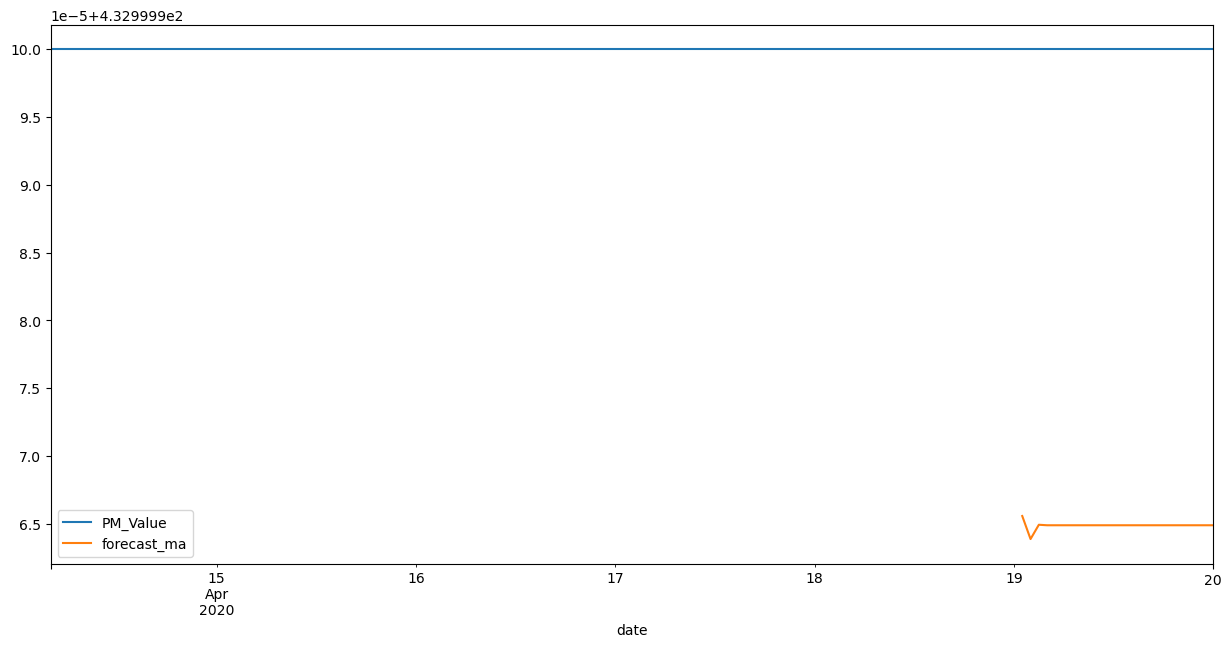

In [297]:
data3[['PM_Value', 'forecast_ma']][2500:].plot(figsize=(15, 7))


In [298]:
#SARIMAX model to account for seasonality
import statsmodels.api as sm

model5 = sm.tsa.statespace.SARIMAX(
    data3.PM_Value,
    order=(0, 1, 4),
    seasonal_order=(0, 1, 1, 24)
)

result = model5.fit()


In [299]:
#Prediction using SARIMAX
data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=False
)


<Axes: xlabel='date'>

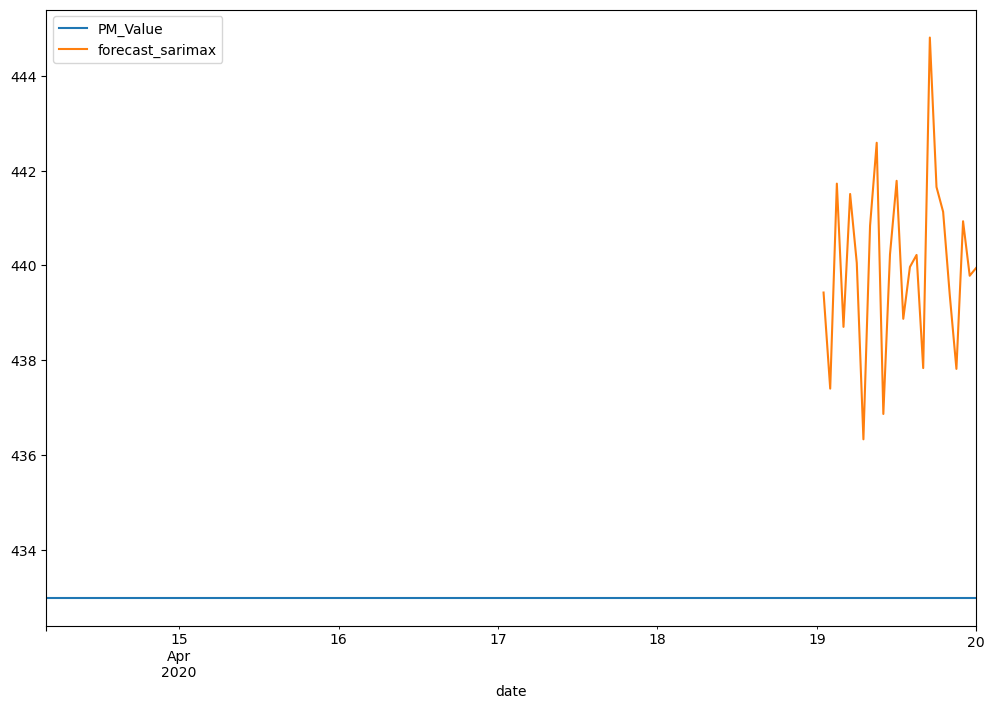

In [300]:
#Plot actual vs SARIMAX forecast
data3[['PM_Value', 'forecast_sarimax']][2500:].plot(figsize=(12, 8))


This is the besat model that is MA model using SARIMAX

ARIMA MODEL

BUILD ma model using arima and sarimax 

In [301]:
#Evaluating SARIMA model using RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_MA_SARIMA = np.sqrt(
    mean_squared_error(
        data3.PM_Value[2617:2641],
        data3.forecast_sarimax[2617:2641]
    )
)

print("RMSE:", RMSE_MA_SARIMA)


RMSE: 7.247855691527518


In [302]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(data3.PM_Value, order=(3, 1, 4))
model_arima_fit = model_arima.fit()


In [303]:
model_arima_fit.aic



np.float64(24124.6210087855)

In [304]:
model_arima_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               PM_Value   No. Observations:                 2641
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -12054.311
Date:                Wed, 14 Jan 2026   AIC                          24124.621
Time:                        17:24:21   BIC                          24171.649
Sample:                    01-01-2020   HQIC                         24141.647
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0601      0.157     -6.736      0.000      -1.369      -0.752
ar.L2         -1.1610      0.113    -10.312      0.000      -1.382      -0.940
ar.L3         -0.5920      0.158     -3.753      0.000      -0.901      -0.283
ma.L1          0.1657      0.150      1.107      0.268      -0.128       0.459
ma.L2          0.1451      0.103      1.414      0.157      -0.056       0.346
ma.L3         -0.4915      0.108     -4.562      0.000      -0.703      -0.280
ma.L4         -0.6183      0.140     -4.429      0.000      -0.892      -0.345
sigma2       541.1605     13.363     40.497      0.000     514.970     567.351
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                28.53
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [305]:
#Predicting values using ARIMA model
# Predicting the values using the model

data3['forecast_arima'] = model_arima_fit.predict(
    start=2617,
    end=2641,
    dynamic=True
)


<Axes: xlabel='date'>

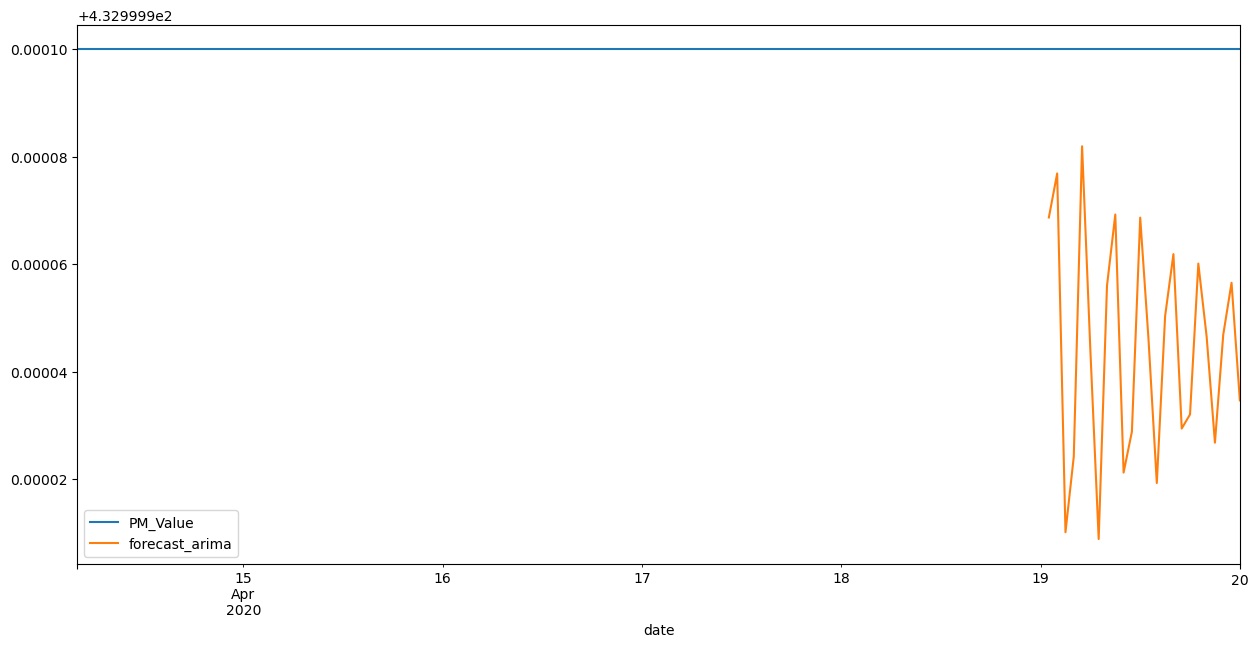

In [306]:
#Plot actual vs ARIMA forecast
data3[['PM_Value', 'forecast_arima']][2500:].plot(figsize=(15, 7))


this is agai the best model we got

In [307]:
#Building SARIMAX Model (final / best model)
import statsmodels.api as sm

model6 = sm.tsa.statespace.SARIMAX(
    data3.PM_Value,
    order=(3, 1, 4),
    seasonal_order=(3, 1, 4, 24)
)

result = model6.fit()


In [308]:
#Prediction using SARIMAX
data3['forecast_sarimax'] = result.predict(
    start=2617,
    end=2641,
    dynamic=True
)


<Axes: xlabel='date'>

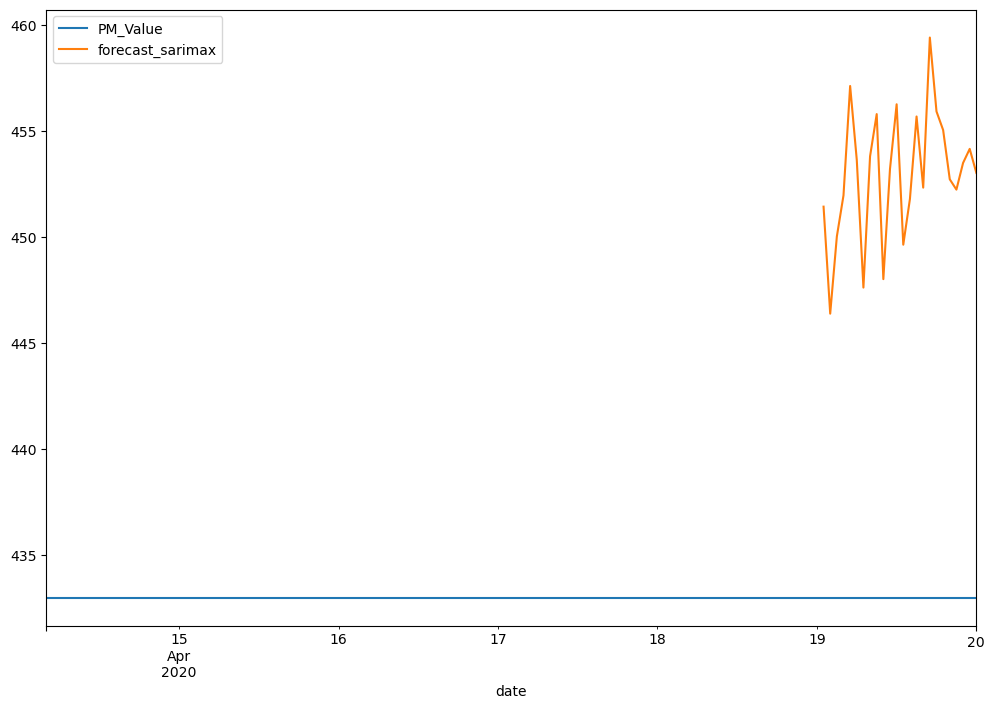

In [309]:
#Plot actual vs SARIMAX forecast
data3[['PM_Value', 'forecast_sarimax']][2500:].plot(figsize=(12, 8))


In [310]:
#Evaluating SARIMA model (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_ARIMA_SARIMA = np.sqrt(
    mean_squared_error(
        data3.PM_Value[2617:2641],
        data3.forecast_sarimax[2617:2641]
    )
)

print("RMSE:", RMSE_ARIMA_SARIMA)


RMSE: 20.18485173091145


In [311]:
#Forecasting PM2.5 for Next 10 Days
#Create Future Date Index
import datetime
import pandas as pd

start = datetime.datetime.strptime("20-04-2020", "%d-%m-%Y")
end = datetime.datetime.strptime("30-04-2020", "%d-%m-%Y")

x = []
for i in range(0, (end - start).days):
    for j in range(0, 24):
        date_generated = start + datetime.timedelta(days=i, hours=j)
        x.append(date_generated)

x = pd.DataFrame(x[:], columns=['Date'])
x.set_index('Date', inplace=True)
x.tail()


""
Date
2020-04-29 19:00:00
2020-04-29 20:00:00
2020-04-29 21:00:00
2020-04-29 22:00:00
2020-04-29 23:00:00


In [312]:
#Concatenate New Dates With Original Dataset
data3 = pd.concat([data3, x], axis=0)
data3.tail()


,PM_Value,forecast_ar,forecast_sarimax,forecast_MA,forecast_SARIMAX,pm_scaled,forecast_arima,forecast,forecast_ma
2020-04-29 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
#Fit the Best Model and Predict Future Values
result = model5.fit()

data3['final_forecast'] = result.predict(
    start=2642,
    end=2882,
    dynamic=True
)


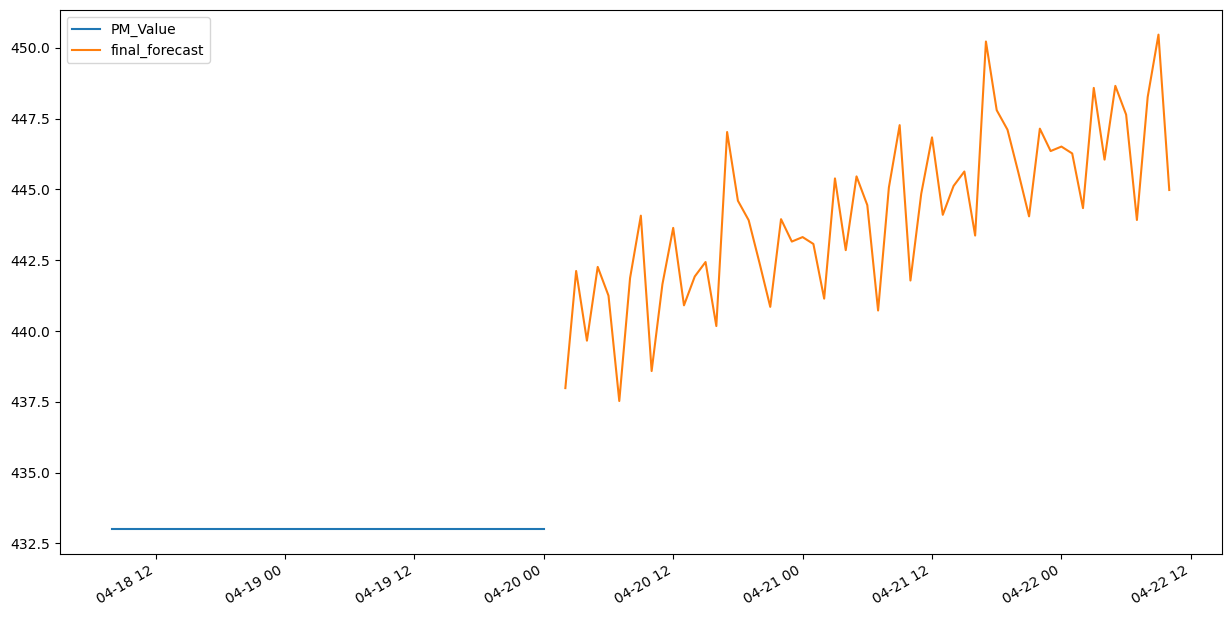

In [315]:
#Plot Actual vs Forecasted PM2.5 Values
import matplotlib.pyplot as plt

data3[['PM_Value', 'final_forecast']][2600:2700].plot(figsize=(15, 8))
plt.show()


In [316]:
#View Predicted Values
data3['final_forecast'][2642:2882]


2020-04-20 01:00:00           NaN
2020-04-20 02:00:00    437.981059
2020-04-20 03:00:00    442.116777
2020-04-20 04:00:00    439.657082
2020-04-20 05:00:00    442.261079
                          ...    
2020-04-29 19:00:00    472.674640
2020-04-29 20:00:00    471.172536
2020-04-29 21:00:00    469.615280
2020-04-29 22:00:00    472.712432
2020-04-29 23:00:00    471.921776
Name: final_forecast, Length: 239, dtype: float64

finally this is our best model result save it